In [207]:
import pylab
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'

In [208]:
f = '/Users/shenchingfeng/GitHub/ML-Forest-Fire-Prediction-with-Regression-and-Classification/data/forestfires.csv'
df = pd.read_csv(f)
d = df.copy()
d_n0 = d[d['area'] > 0].reset_index(drop = True)

### Machine Learning Strategy
- Classification: Distinguish between Area = 0 and Area != 0
- Regression: Predict Forest fire area which is != 0

## Normal distribution test
### Quantile–Quantile plot

In [212]:
def diagnostic_plots(df, variable):
    plt.figure(figsize = (15, 6))
    plt.suptitle(f'Quantile-quantile plot for {variable}', fontsize = 22)
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins = 100, color = 'green')
    
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist = "norm", plot = pylab)
    
    plt.show()

### Target variable "area"

In [213]:
d_n0['area'].describe()

count     270.000000
mean       24.600185
std        86.501635
min         0.090000
25%         2.140000
50%         6.370000
75%        15.422500
max      1090.840000
Name: area, dtype: float64

## "area" distribution

Skewness orginal area data:  12.85
Kurtosis orginal area data:  194.14


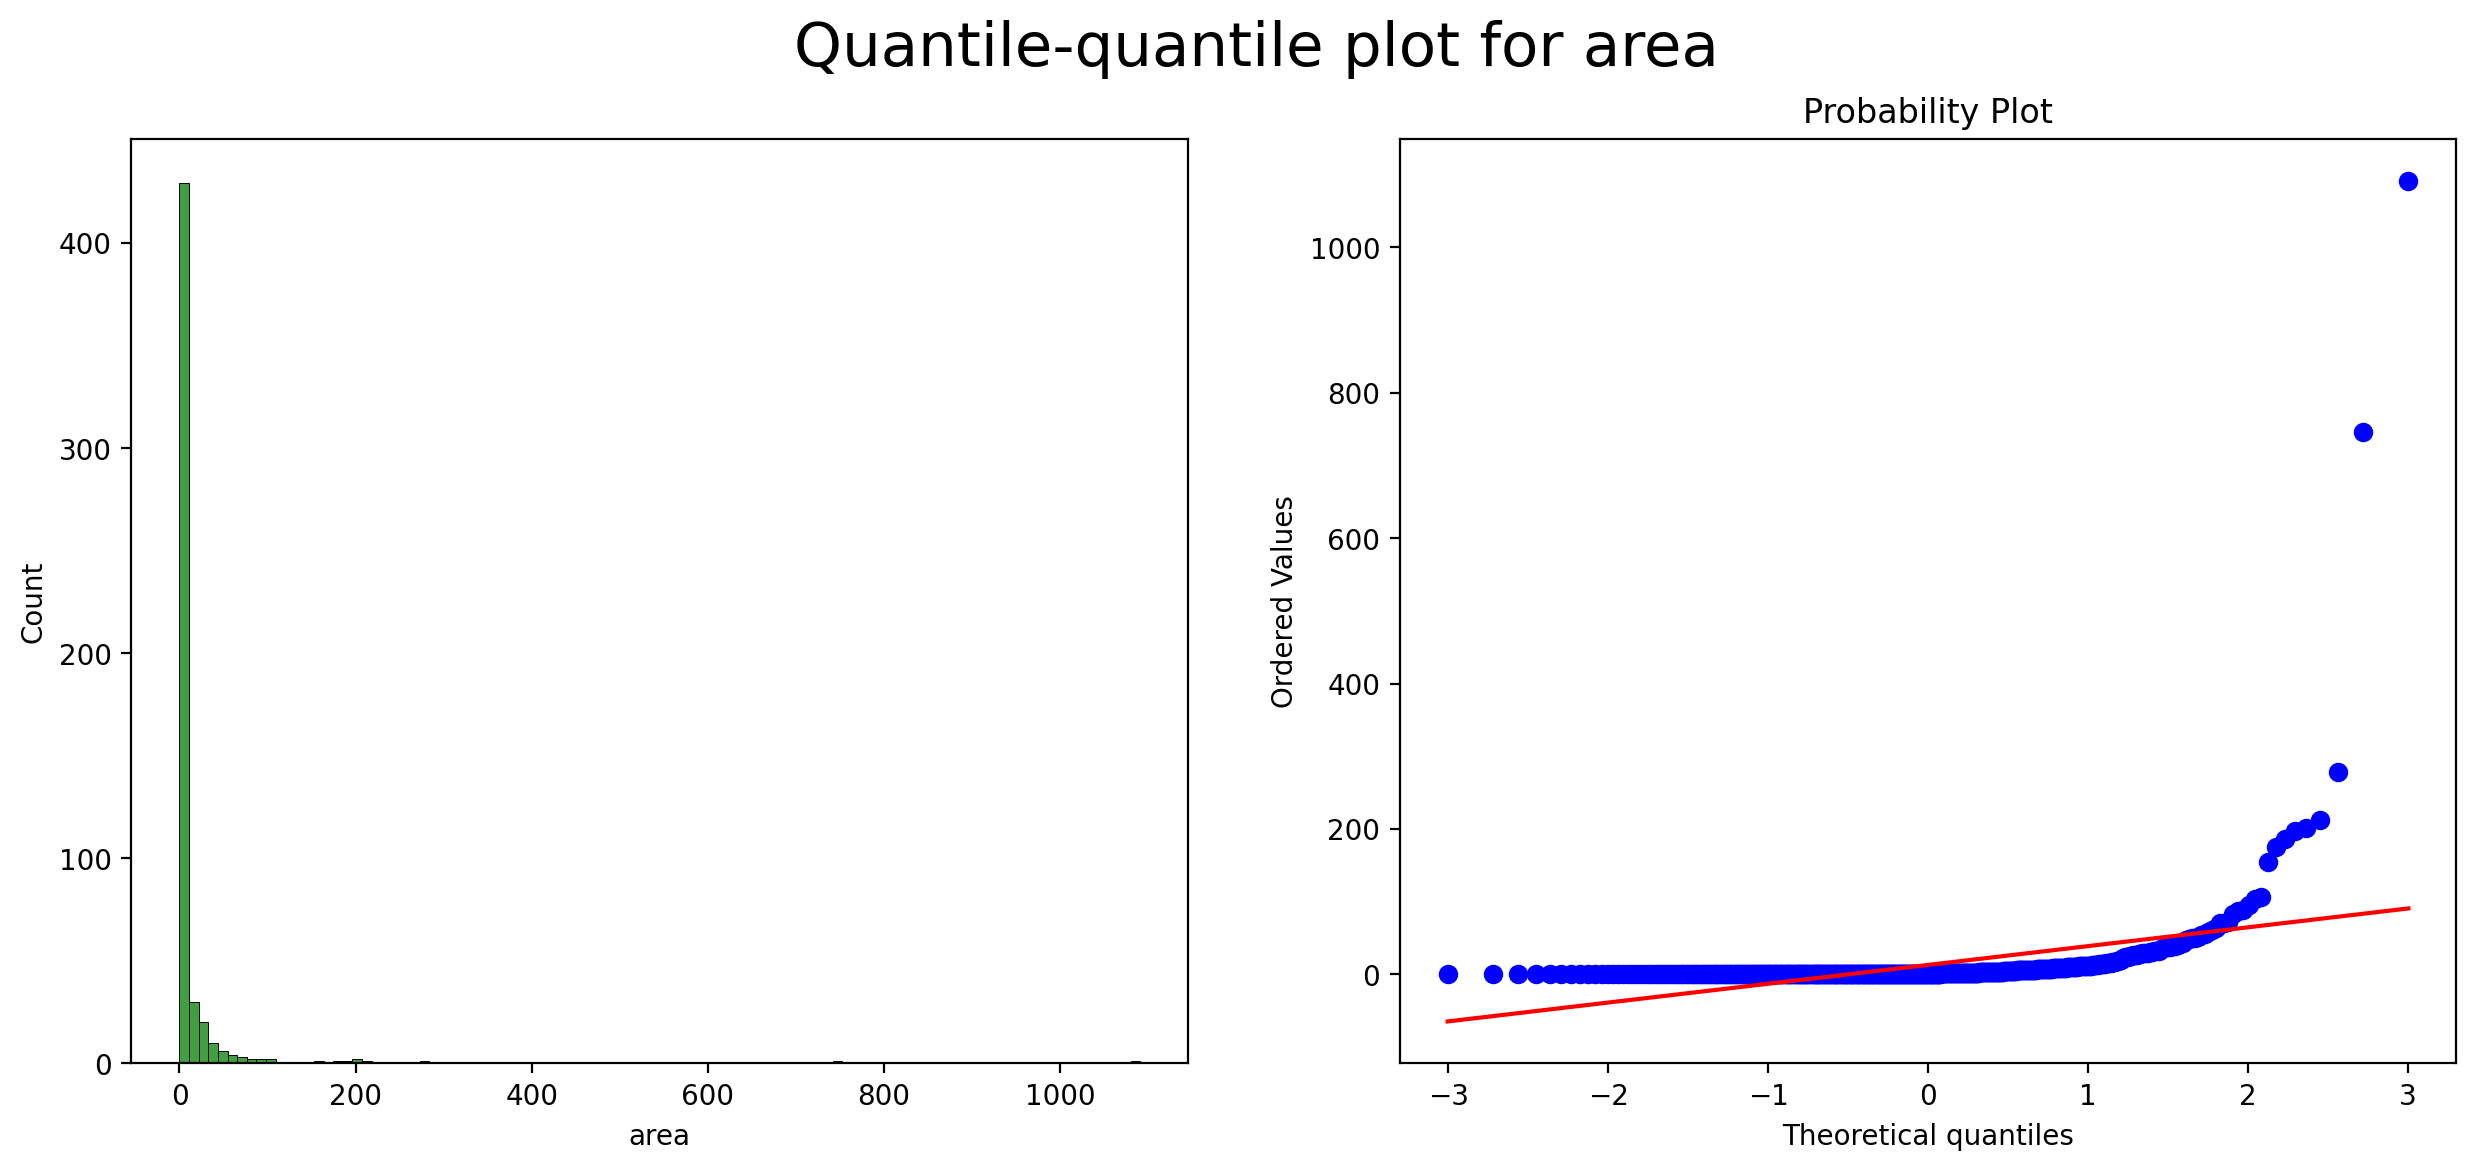

In [214]:
print('Skewness orginal area data: ', round(df['area'].skew(), 2))
print('Kurtosis orginal area data: ', round(df['area'].kurt(), 2))
diagnostic_plots(df, 'area')

Skewness orginal none-zero area data:  9.45
Kurtosis orginal none-zero area data:  103.74


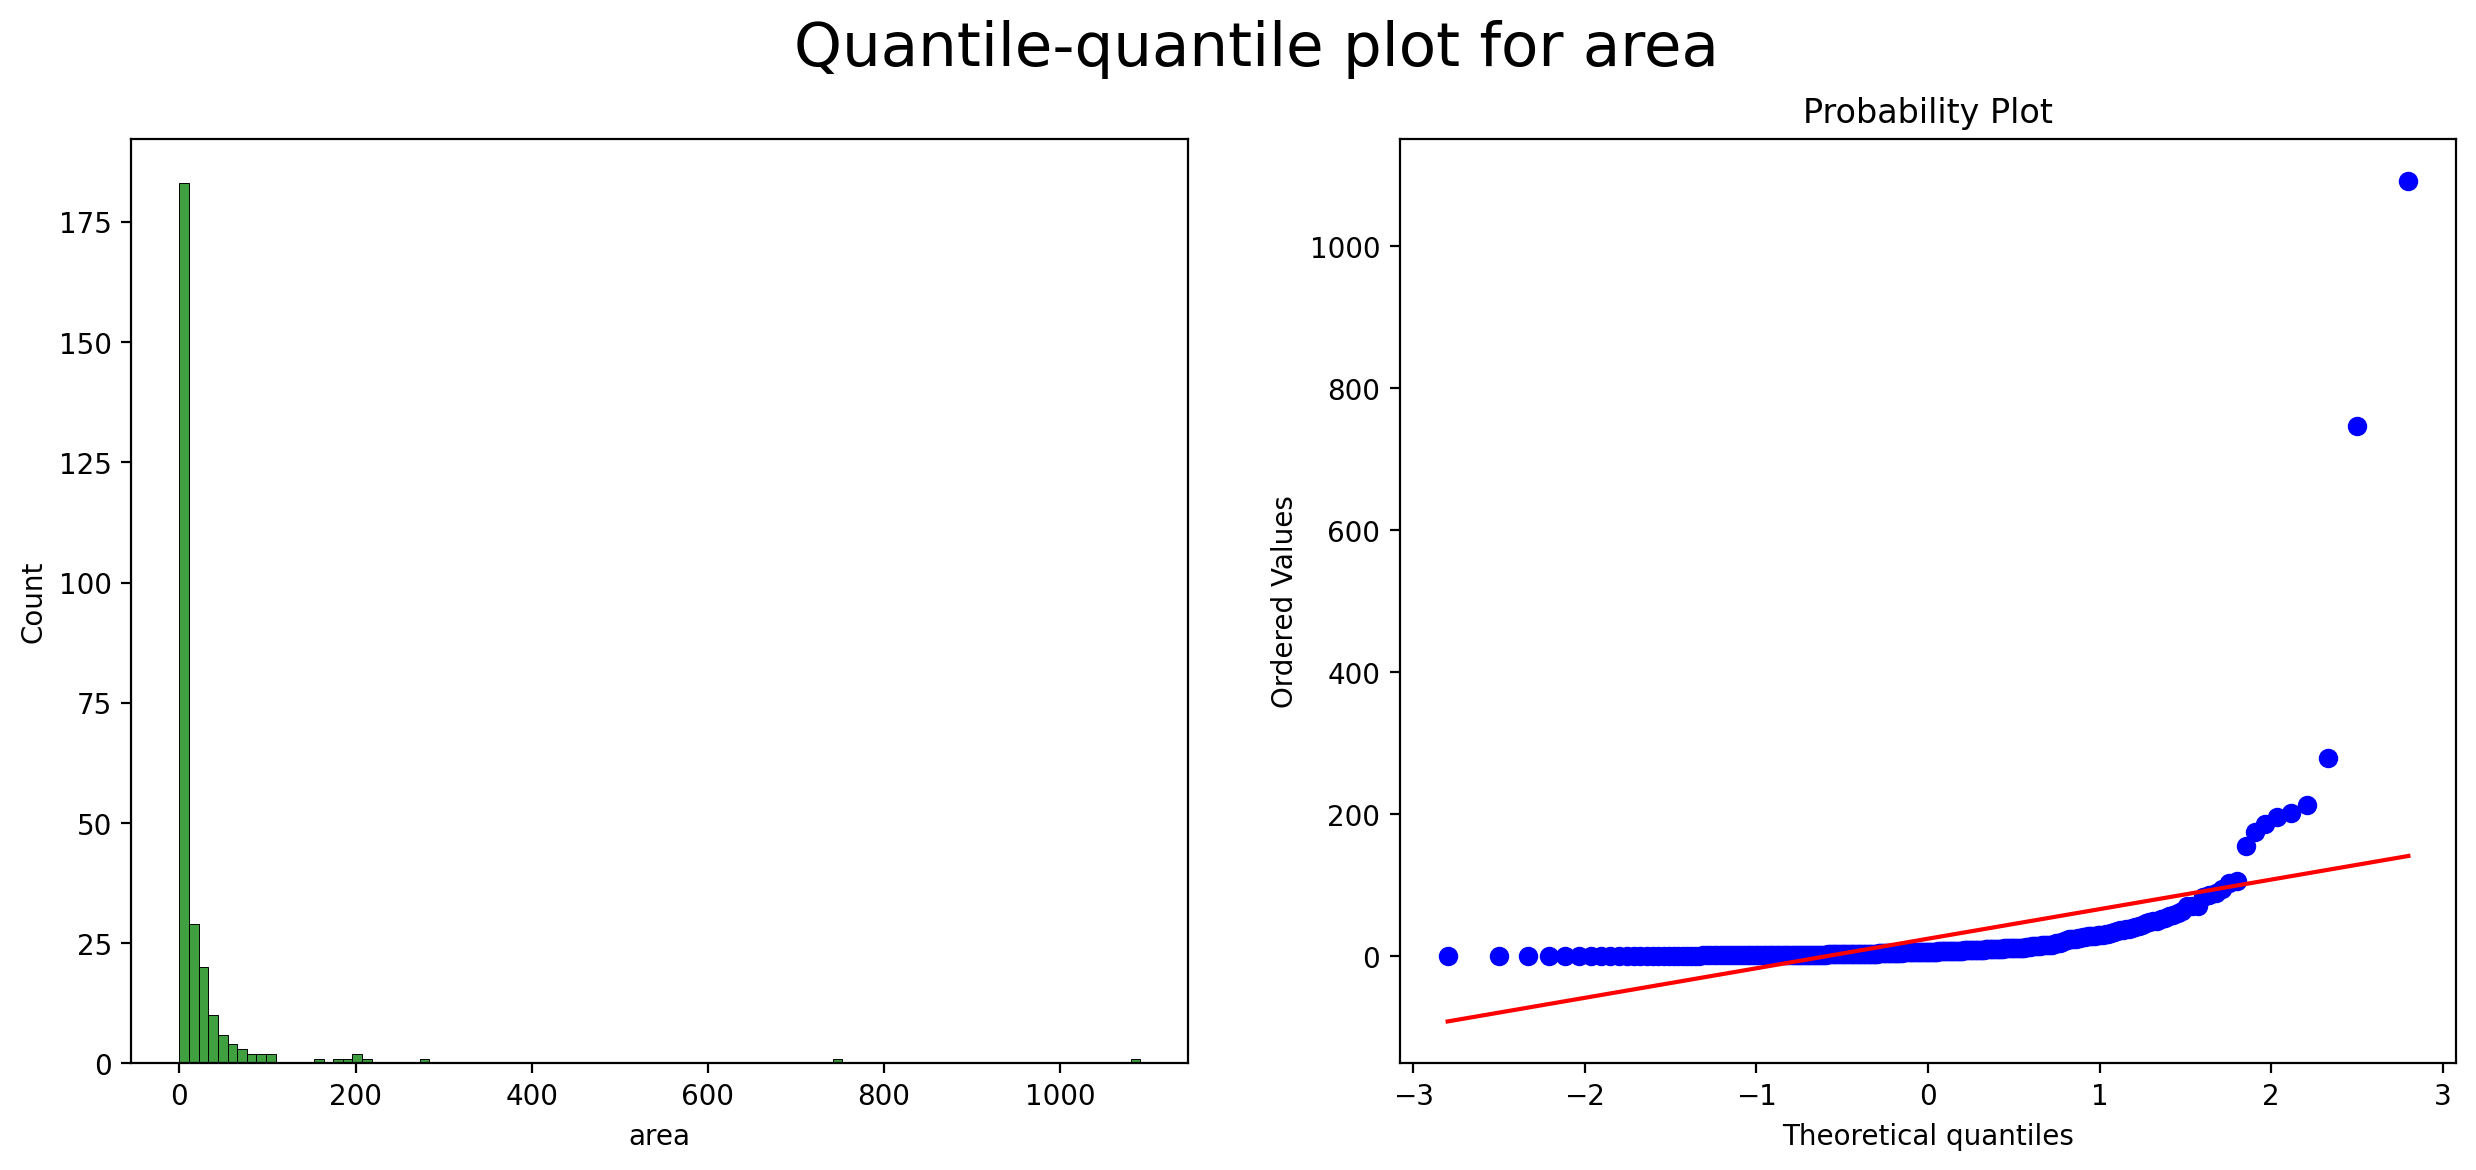

In [215]:
print('Skewness orginal none-zero area data: ', round(d_n0['area'].skew(), 2))
print('Kurtosis orginal none-zero area data: ', round(d_n0['area'].kurt(), 2))
diagnostic_plots(d_n0, 'area')

---

## Variable transformation
Only transform None-Zero data for Regression
- Natural logarithm transformation 
- Reciprocal transformation
- Square root transformation
- Cube root transformation
- Yeo-Johnson transformation
- Box-Cox transformation

In [216]:
trans = []
skew = []
kurt = []

### Natural log transformation

Skewness: 0.2998
Kurtosis: 0.3012


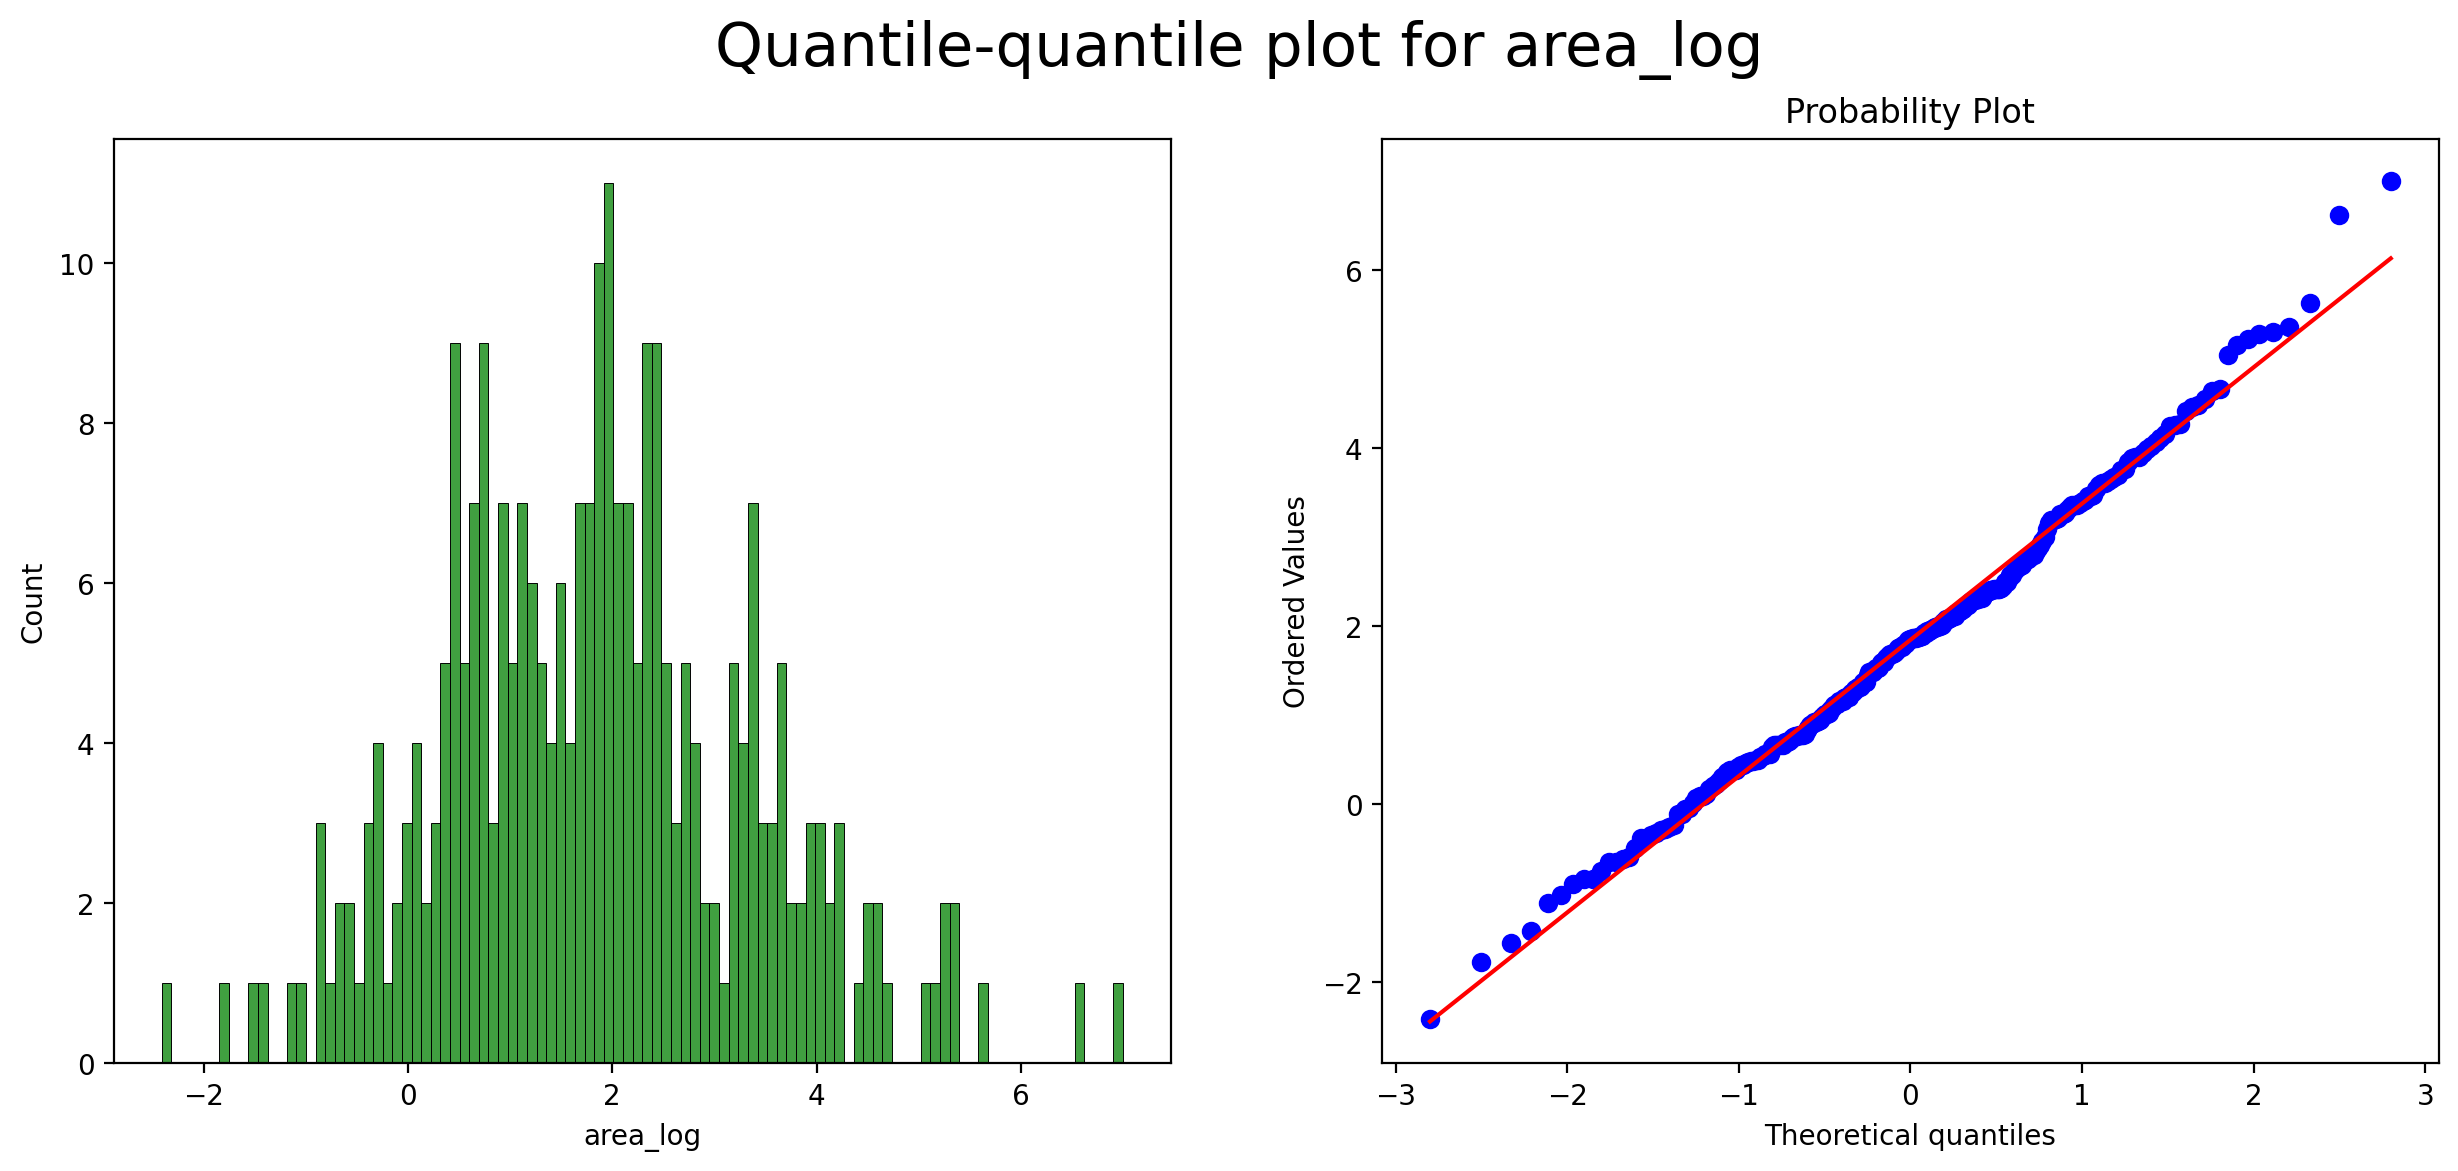

In [217]:
d_n0['area_log'] = np.log(d_n0['area'])

print(f"Skewness: {round(d_n0['area_log'].skew(), 4)}")
print(f"Kurtosis: {round(d_n0['area_log'].kurt(), 4)}")

trans.append("Log")
skew.append(round(d_n0['area_log'].skew(), 4))
kurt.append(round(d_n0['area_log'].kurt(), 4))

diagnostic_plots(d_n0, 'area_log')

### Reciprocal transformation

Skewness: 6.8248
Kurtosis: 63.9071


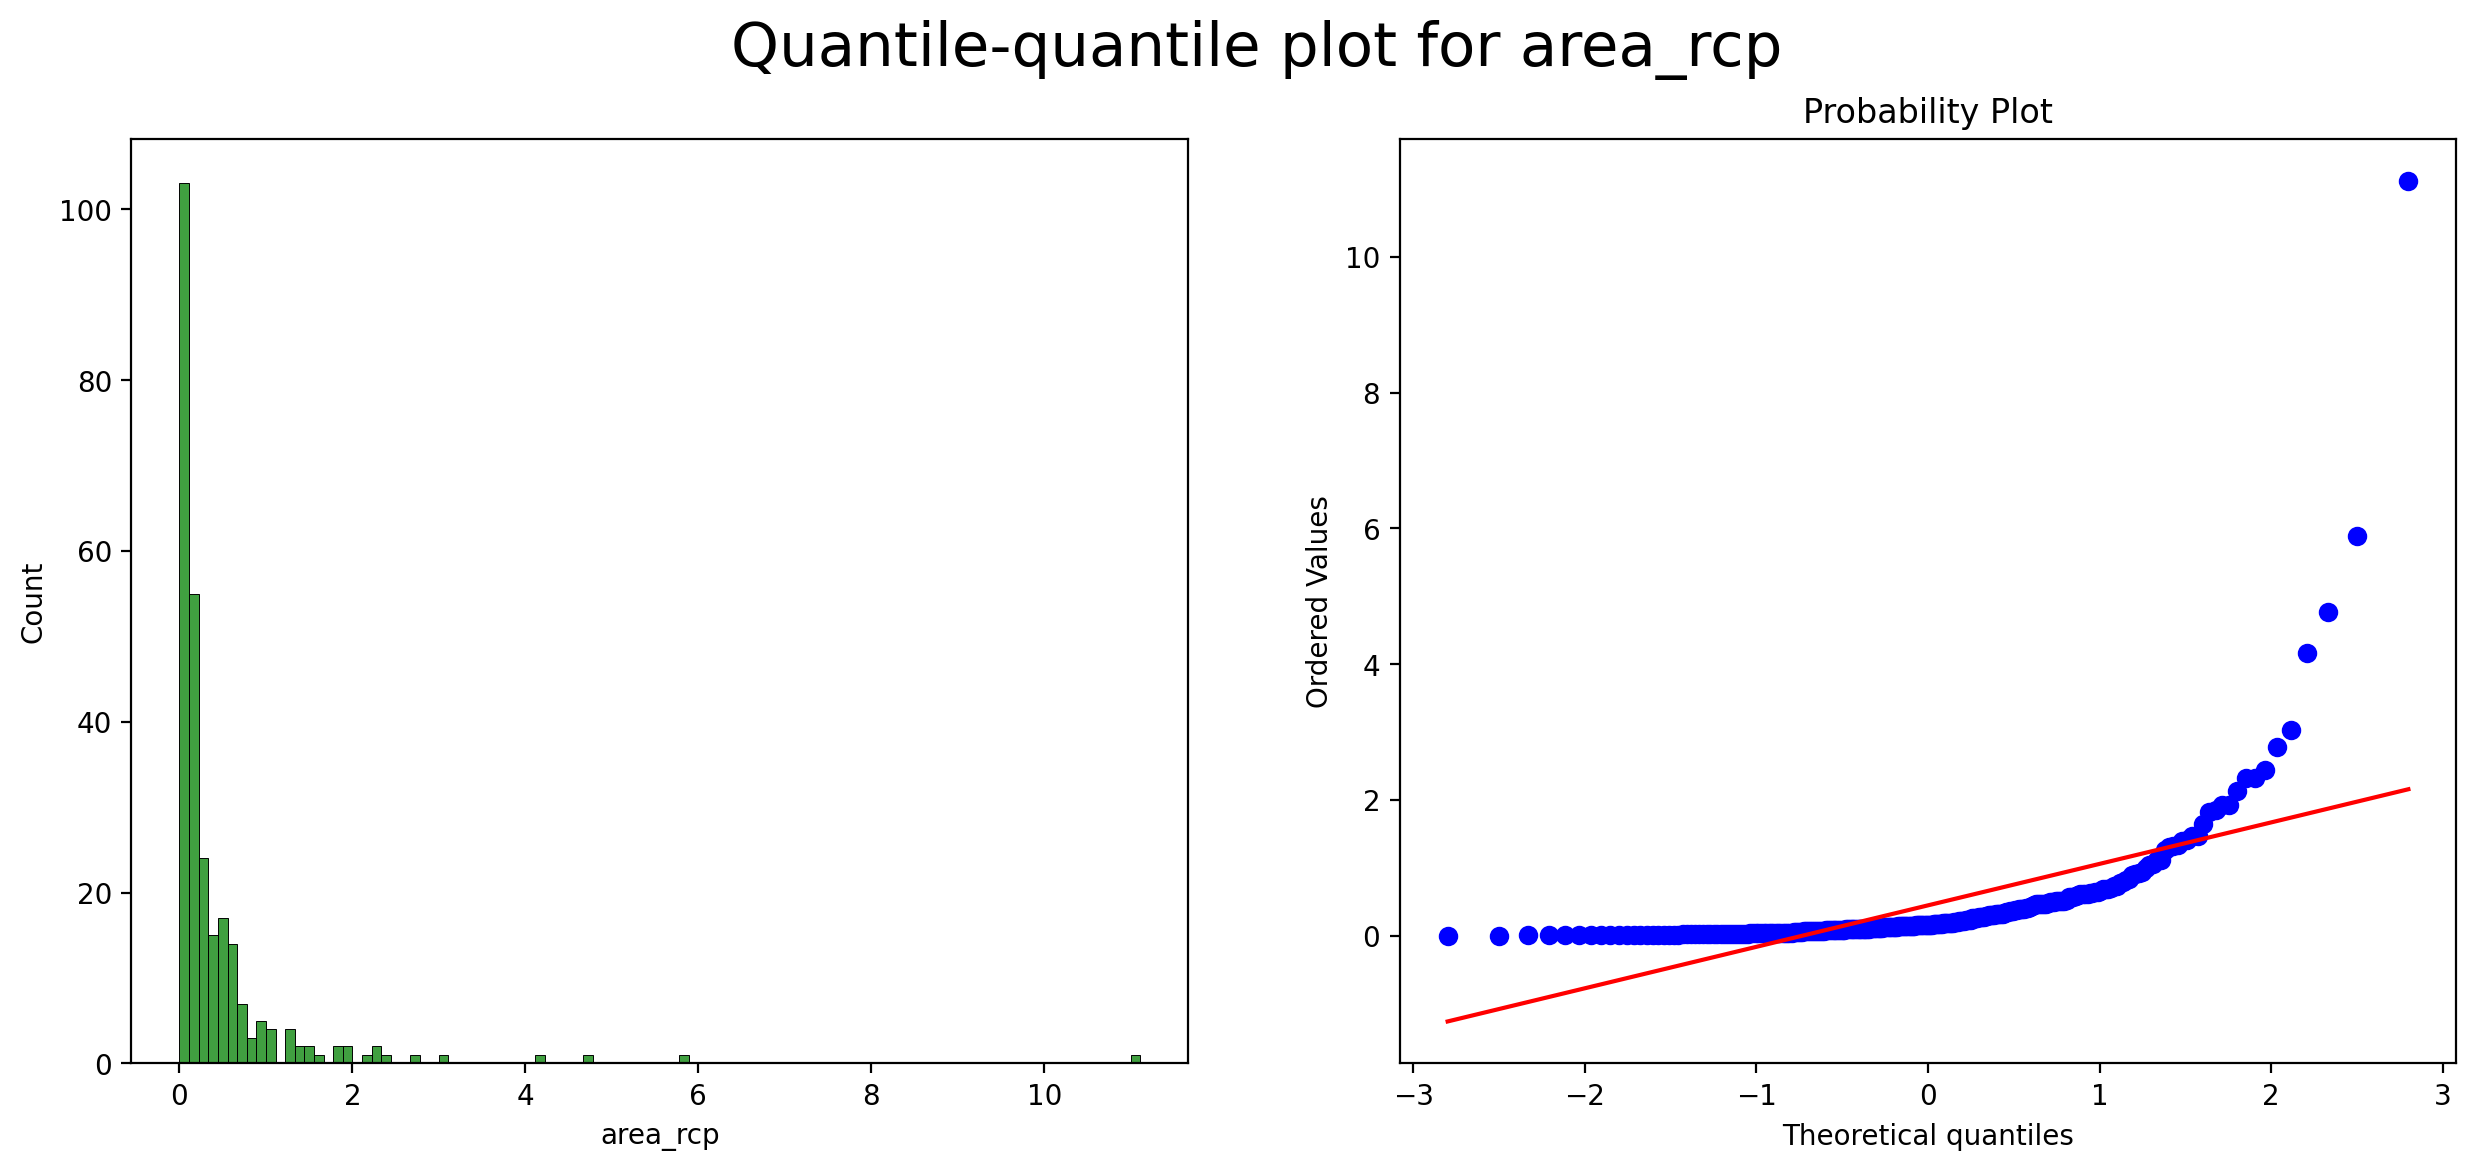

In [218]:
d_n0['area_rcp'] = 1 / d_n0['area']

print(f"Skewness: {round(d_n0['area_rcp'].skew(), 4)}")
print(f"Kurtosis: {round(d_n0['area_rcp'].kurt(), 4)}")

trans.append("Reciprocal")
skew.append(round(d_n0['area_rcp'].skew(), 4))
kurt.append(round(d_n0['area_rcp'].kurt(), 4))

diagnostic_plots(d_n0, 'area_rcp')

### Square Root transformation

Skewness: 4.0973
Kurtosis: 25.1297


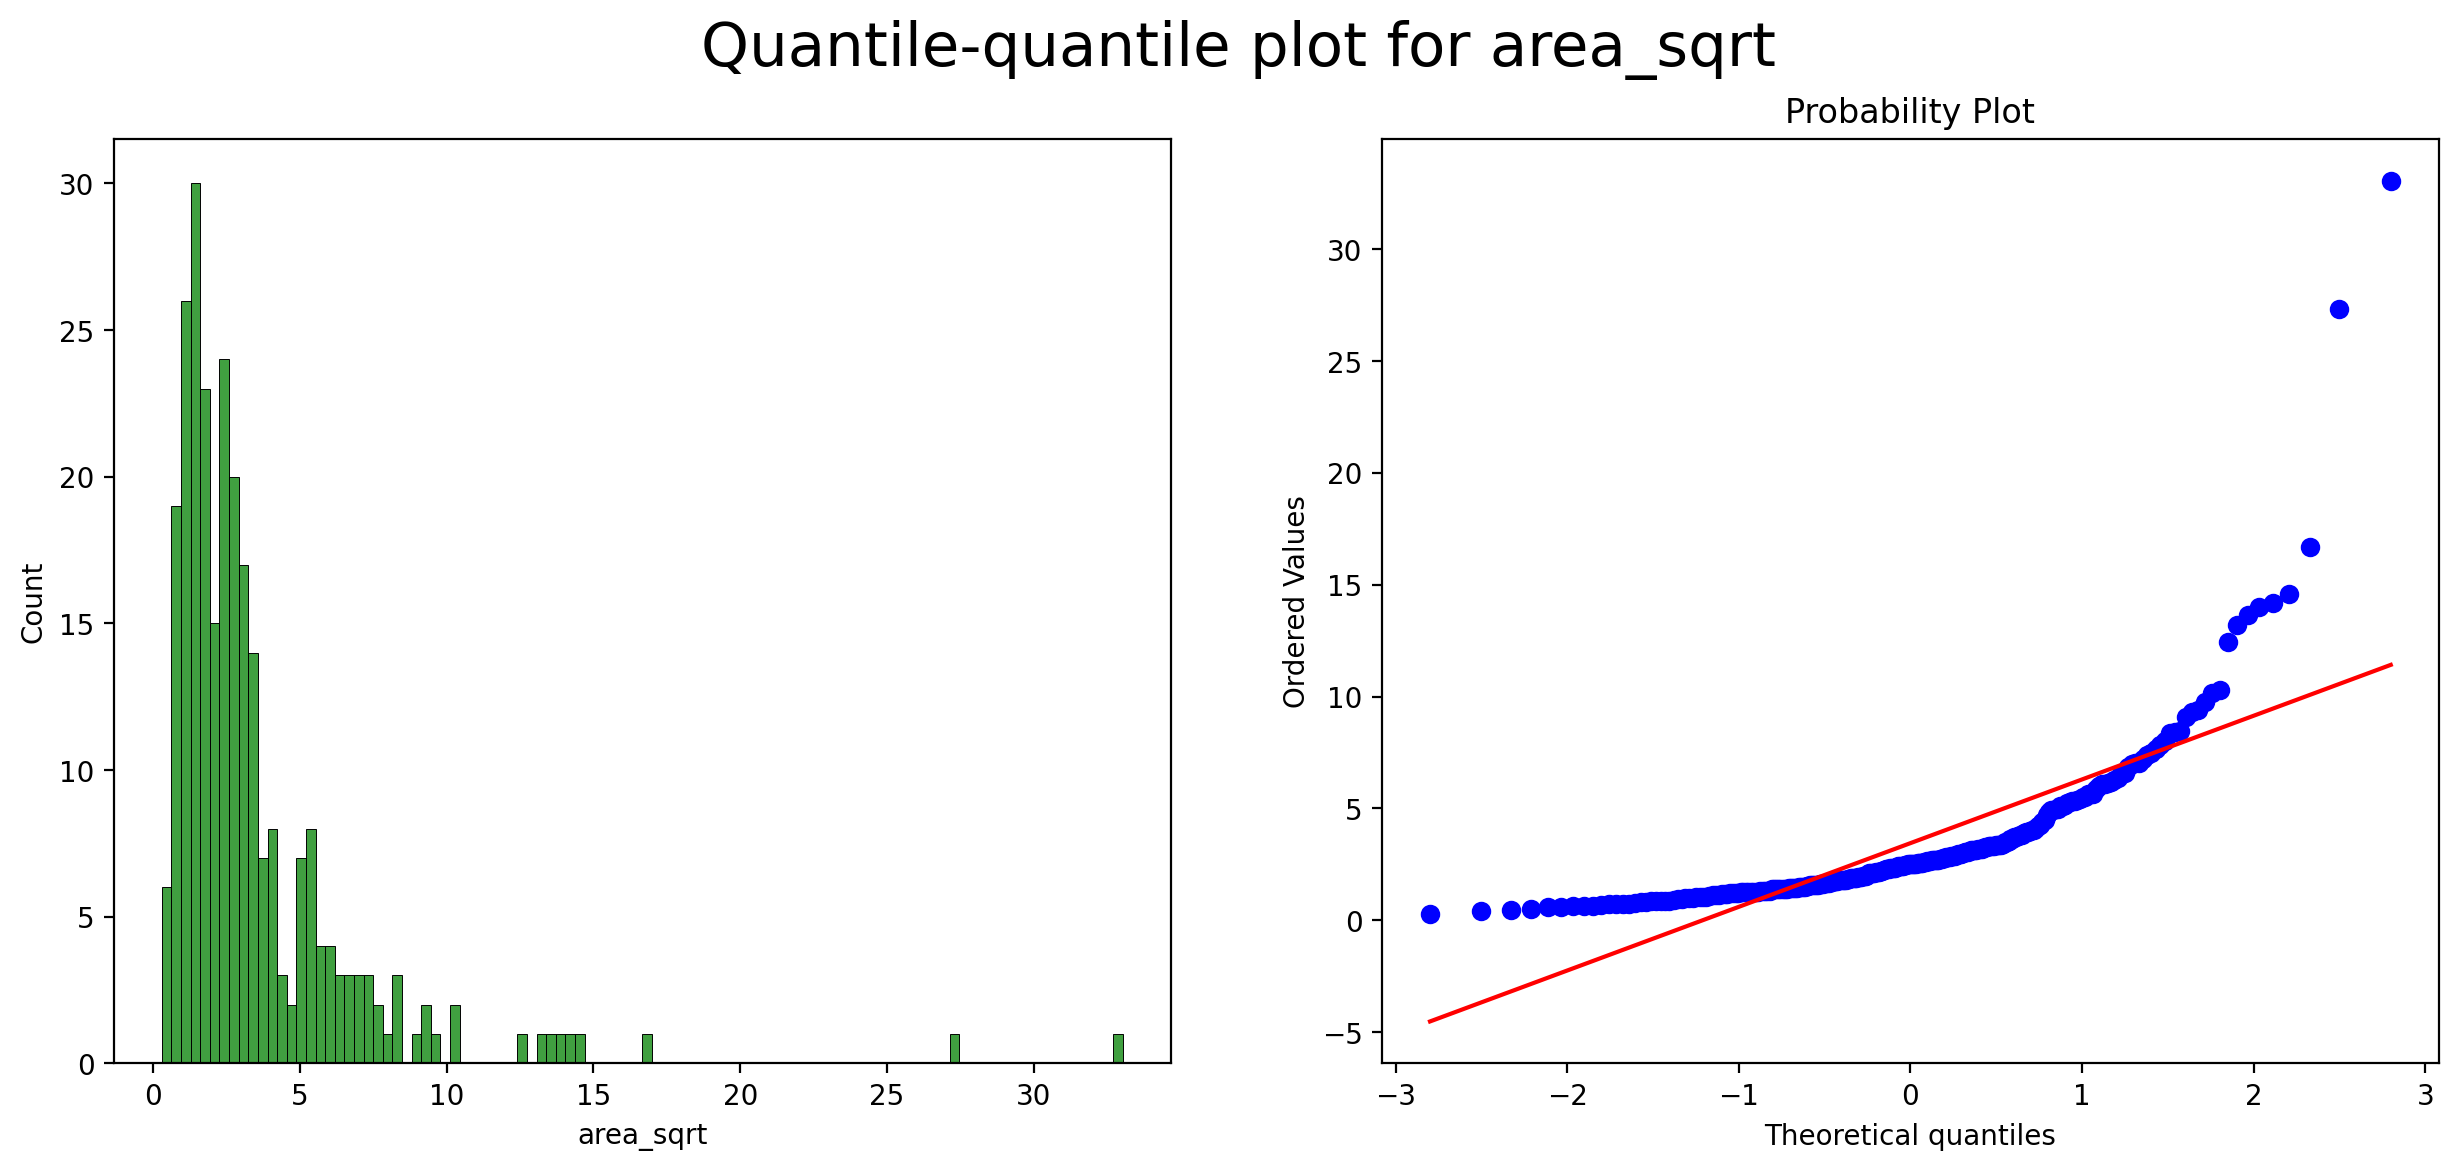

In [219]:
d_n0['area_sqrt'] = np.sqrt(d_n0['area'])

print(f"Skewness: {round(d_n0['area_sqrt'].skew(), 4)}")
print(f"Kurtosis: {round(d_n0['area_sqrt'].kurt(), 4)}")

trans.append("SQRT")
skew.append(round(d_n0['area_sqrt'].skew(), 4))
kurt.append(round(d_n0['area_sqrt'].kurt(), 4))

diagnostic_plots(d_n0, 'area_sqrt')

### Cube root transformation

Skewness: 2.4498
Kurtosis: 9.8399


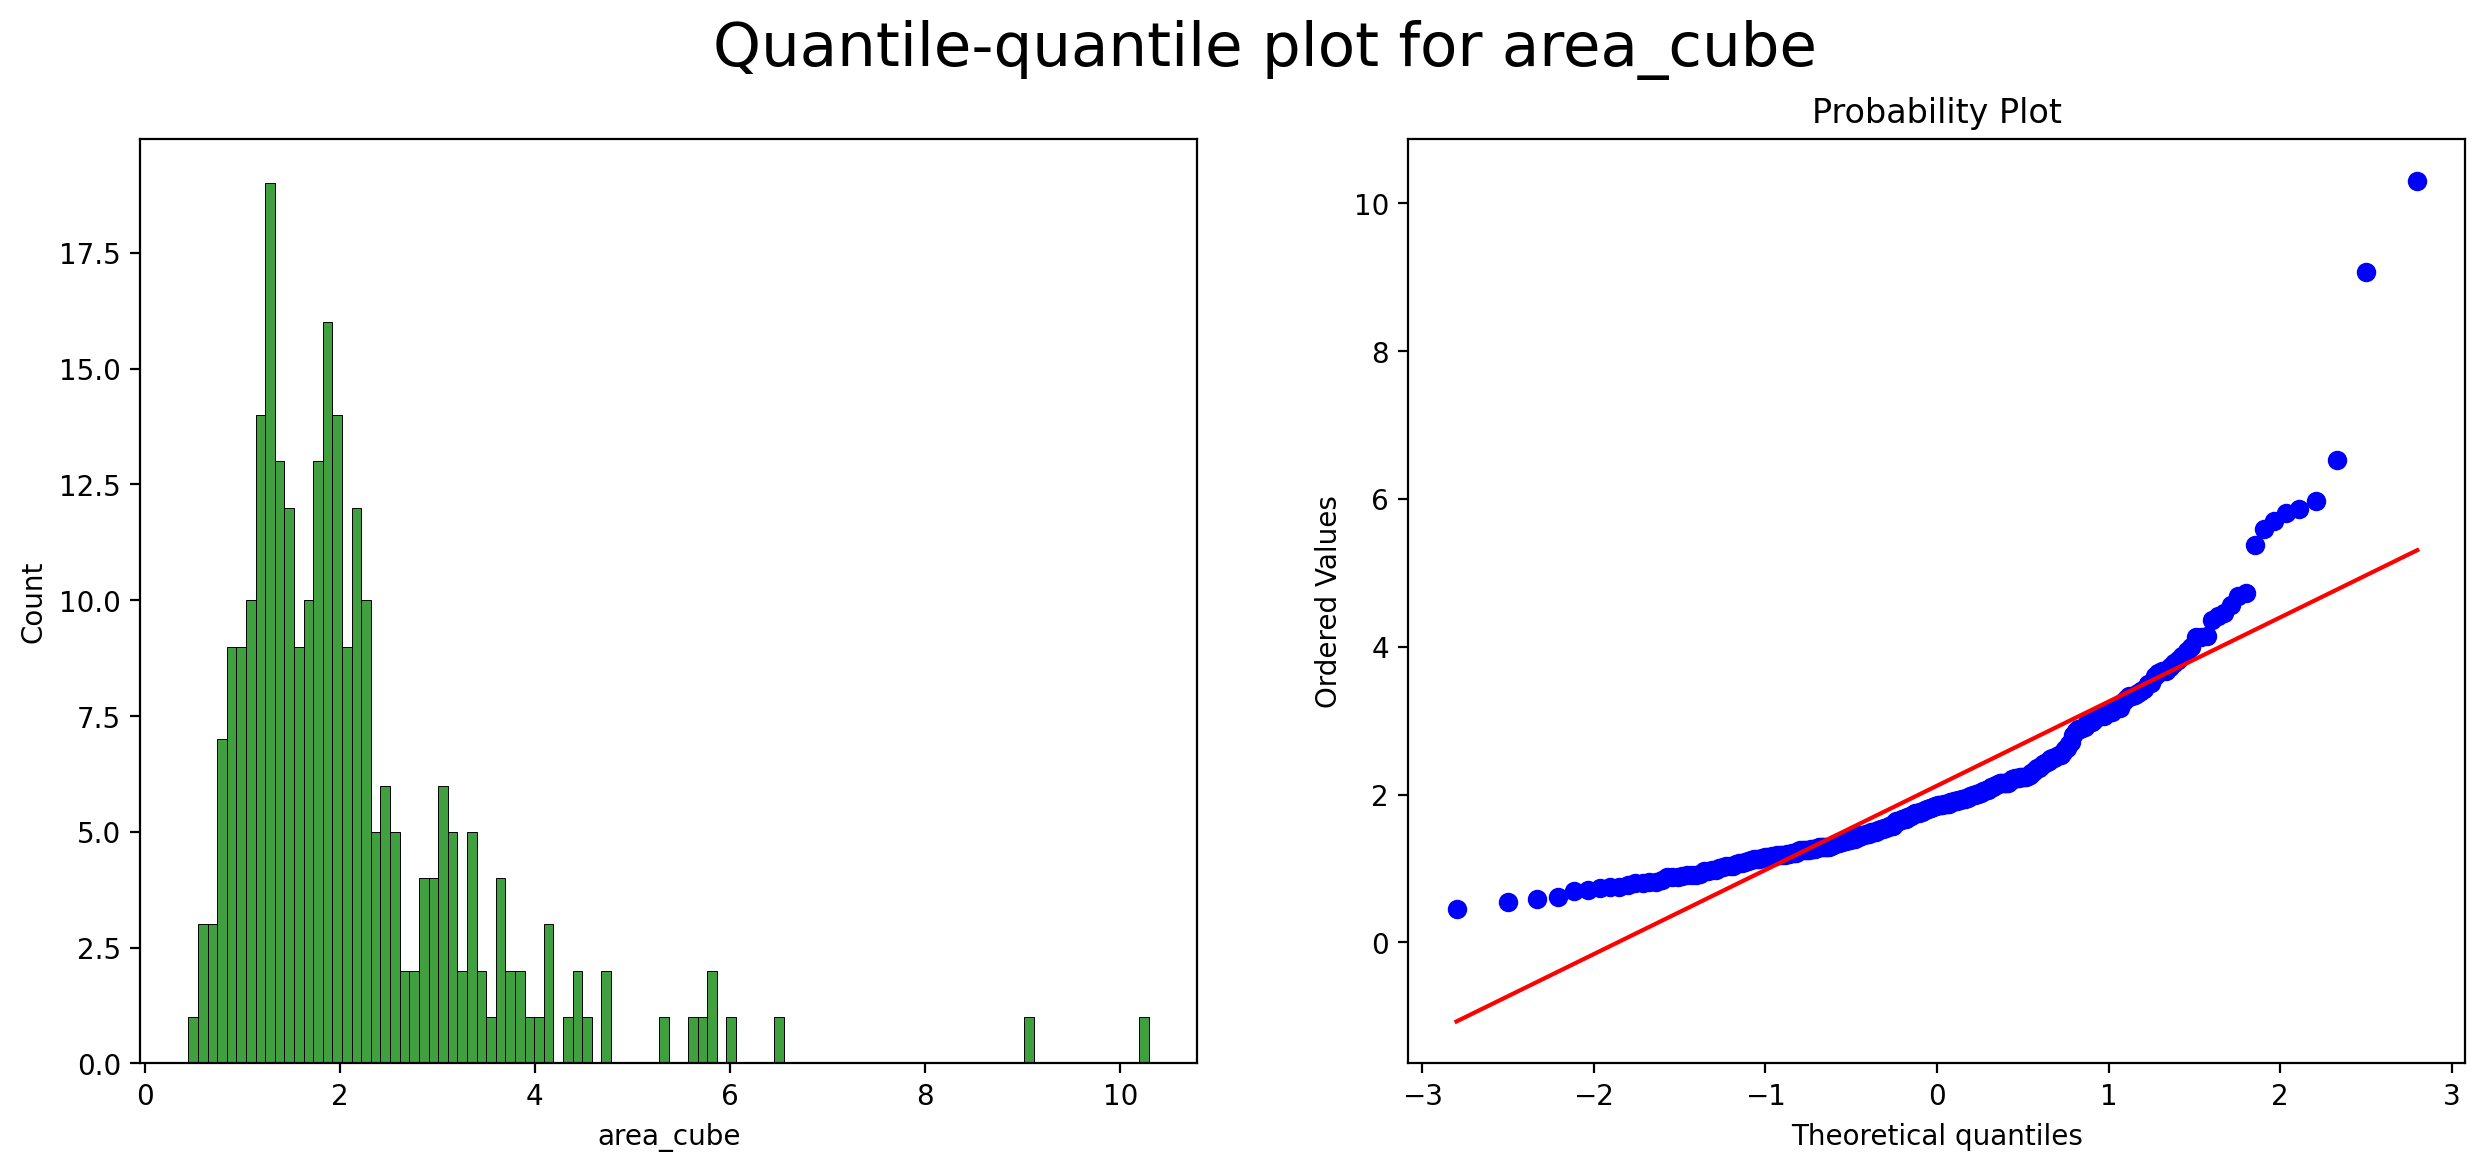

In [220]:
d_n0['area_cube'] = (d_n0['area'])**(1/3)

print(f"Skewness: {round(d_n0['area_cube'].skew(), 4)}")
print(f"Kurtosis: {round(d_n0['area_cube'].kurt(), 4)}")

trans.append("CUBE")
skew.append(round(d_n0['area_cube'].skew(), 4))
kurt.append(round(d_n0['area_cube'].kurt(), 4))

diagnostic_plots(d_n0, 'area_cube')

### Yeo-Johnson transformation

Skewness: 0.08
Kurtosis: -0.6682


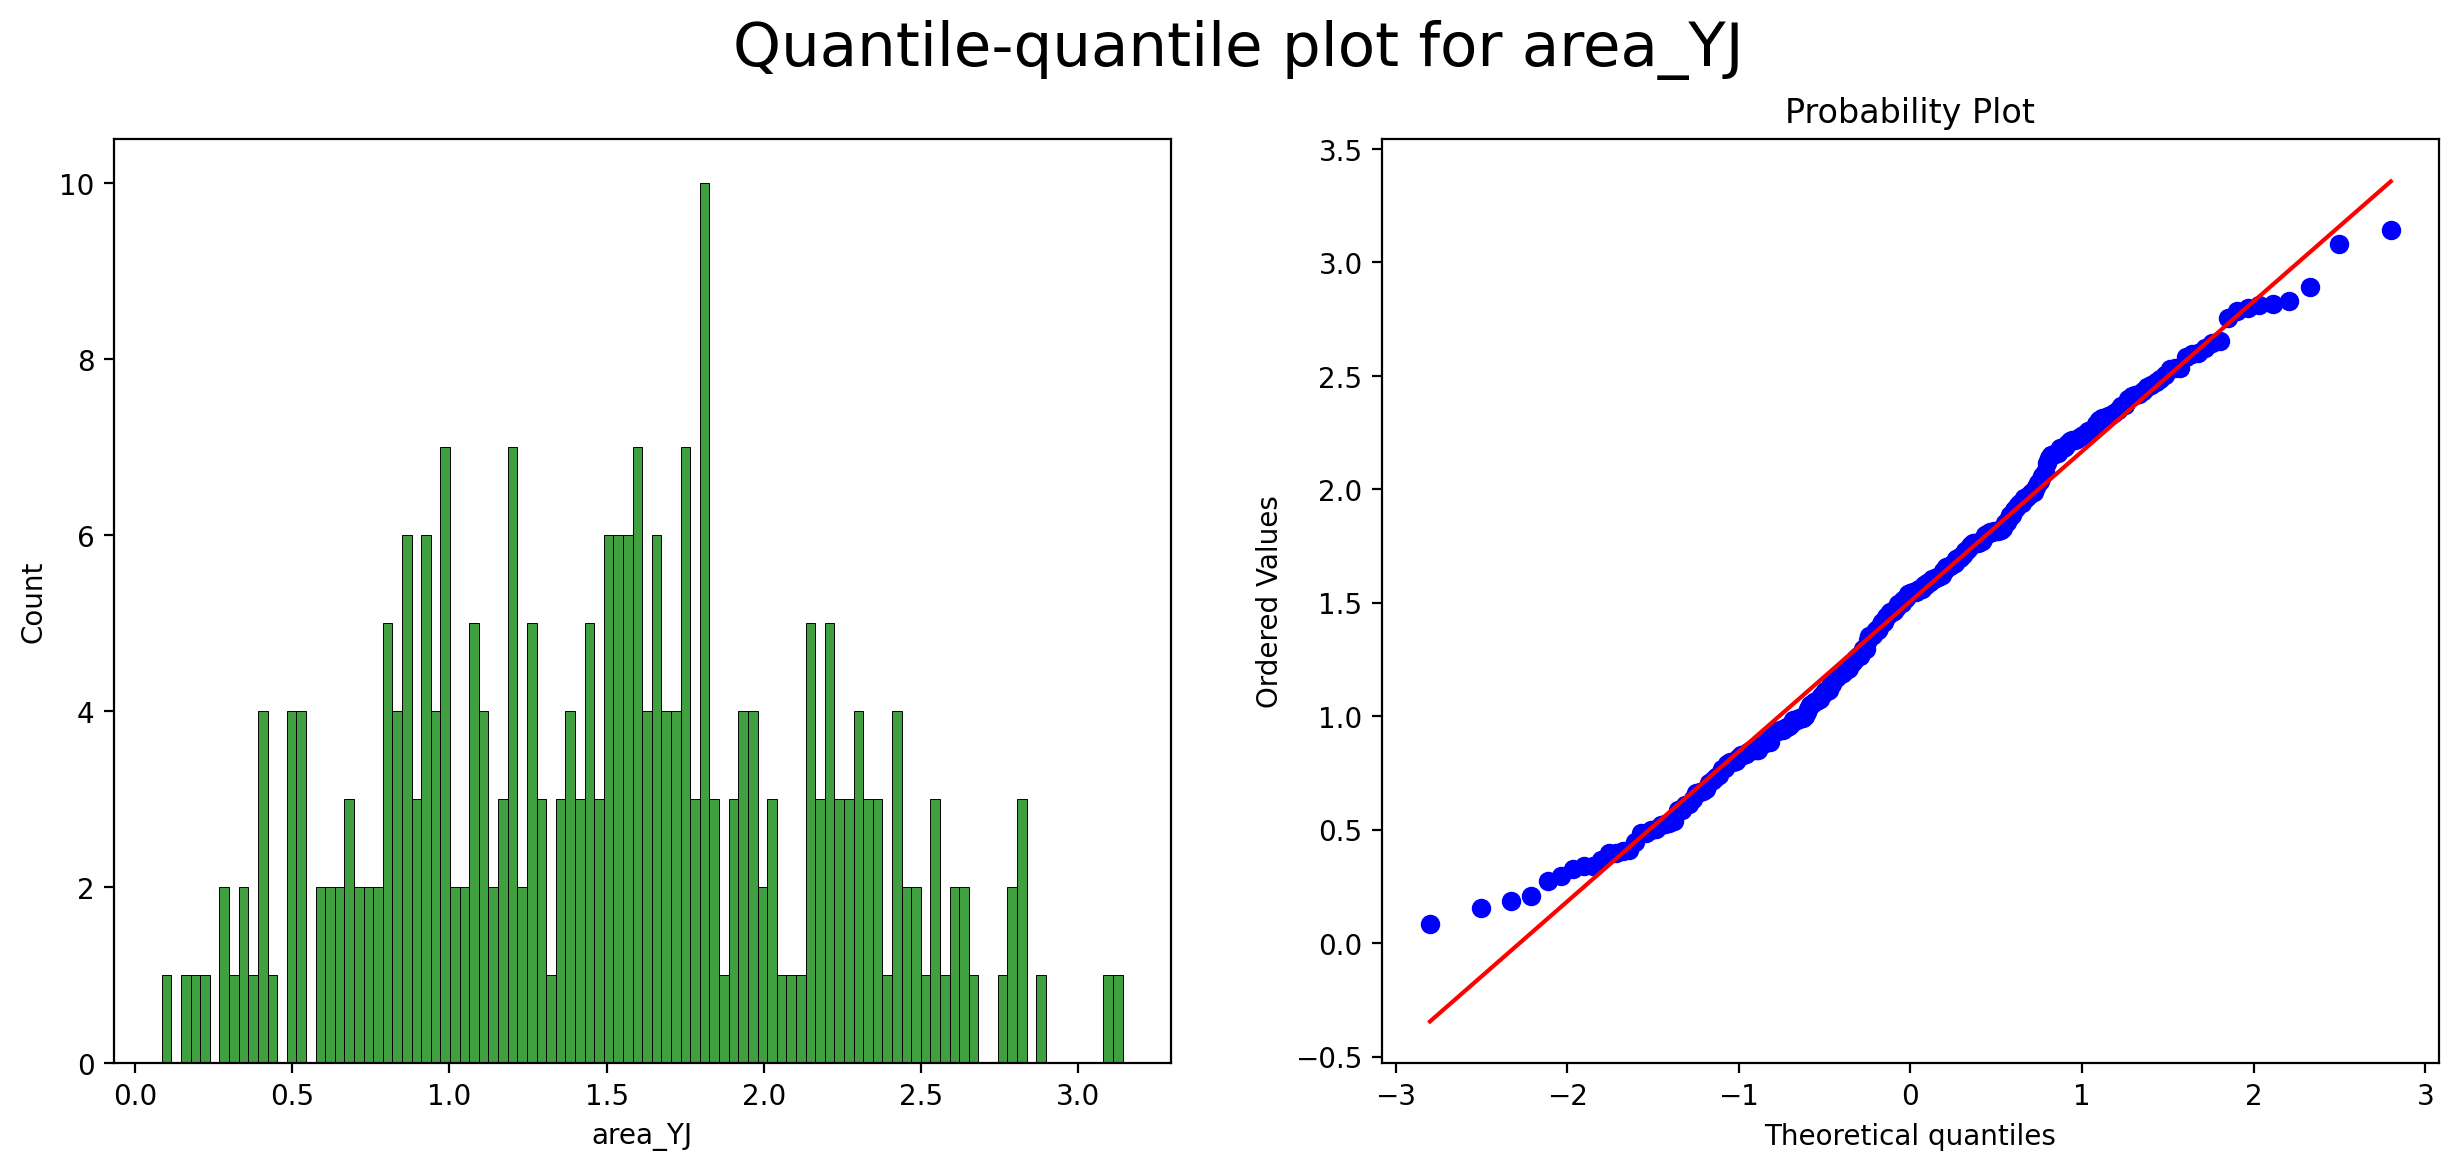

In [221]:
d_n0['area_YJ'], _ = stats.yeojohnson(d_n0['area'])

print(f"Skewness: {round(d_n0['area_YJ'].skew(), 4)}")
print(f"Kurtosis: {round(d_n0['area_YJ'].kurt(), 4)}")

trans.append("YJ")
skew.append(round(d_n0['area_YJ'].skew(), 4))
kurt.append(round(d_n0['area_YJ'].kurt(), 4))

diagnostic_plots(d_n0, 'area_YJ')

### Box-cox transformation

Skewness: -0.0036
Kurtosis: 0.1523


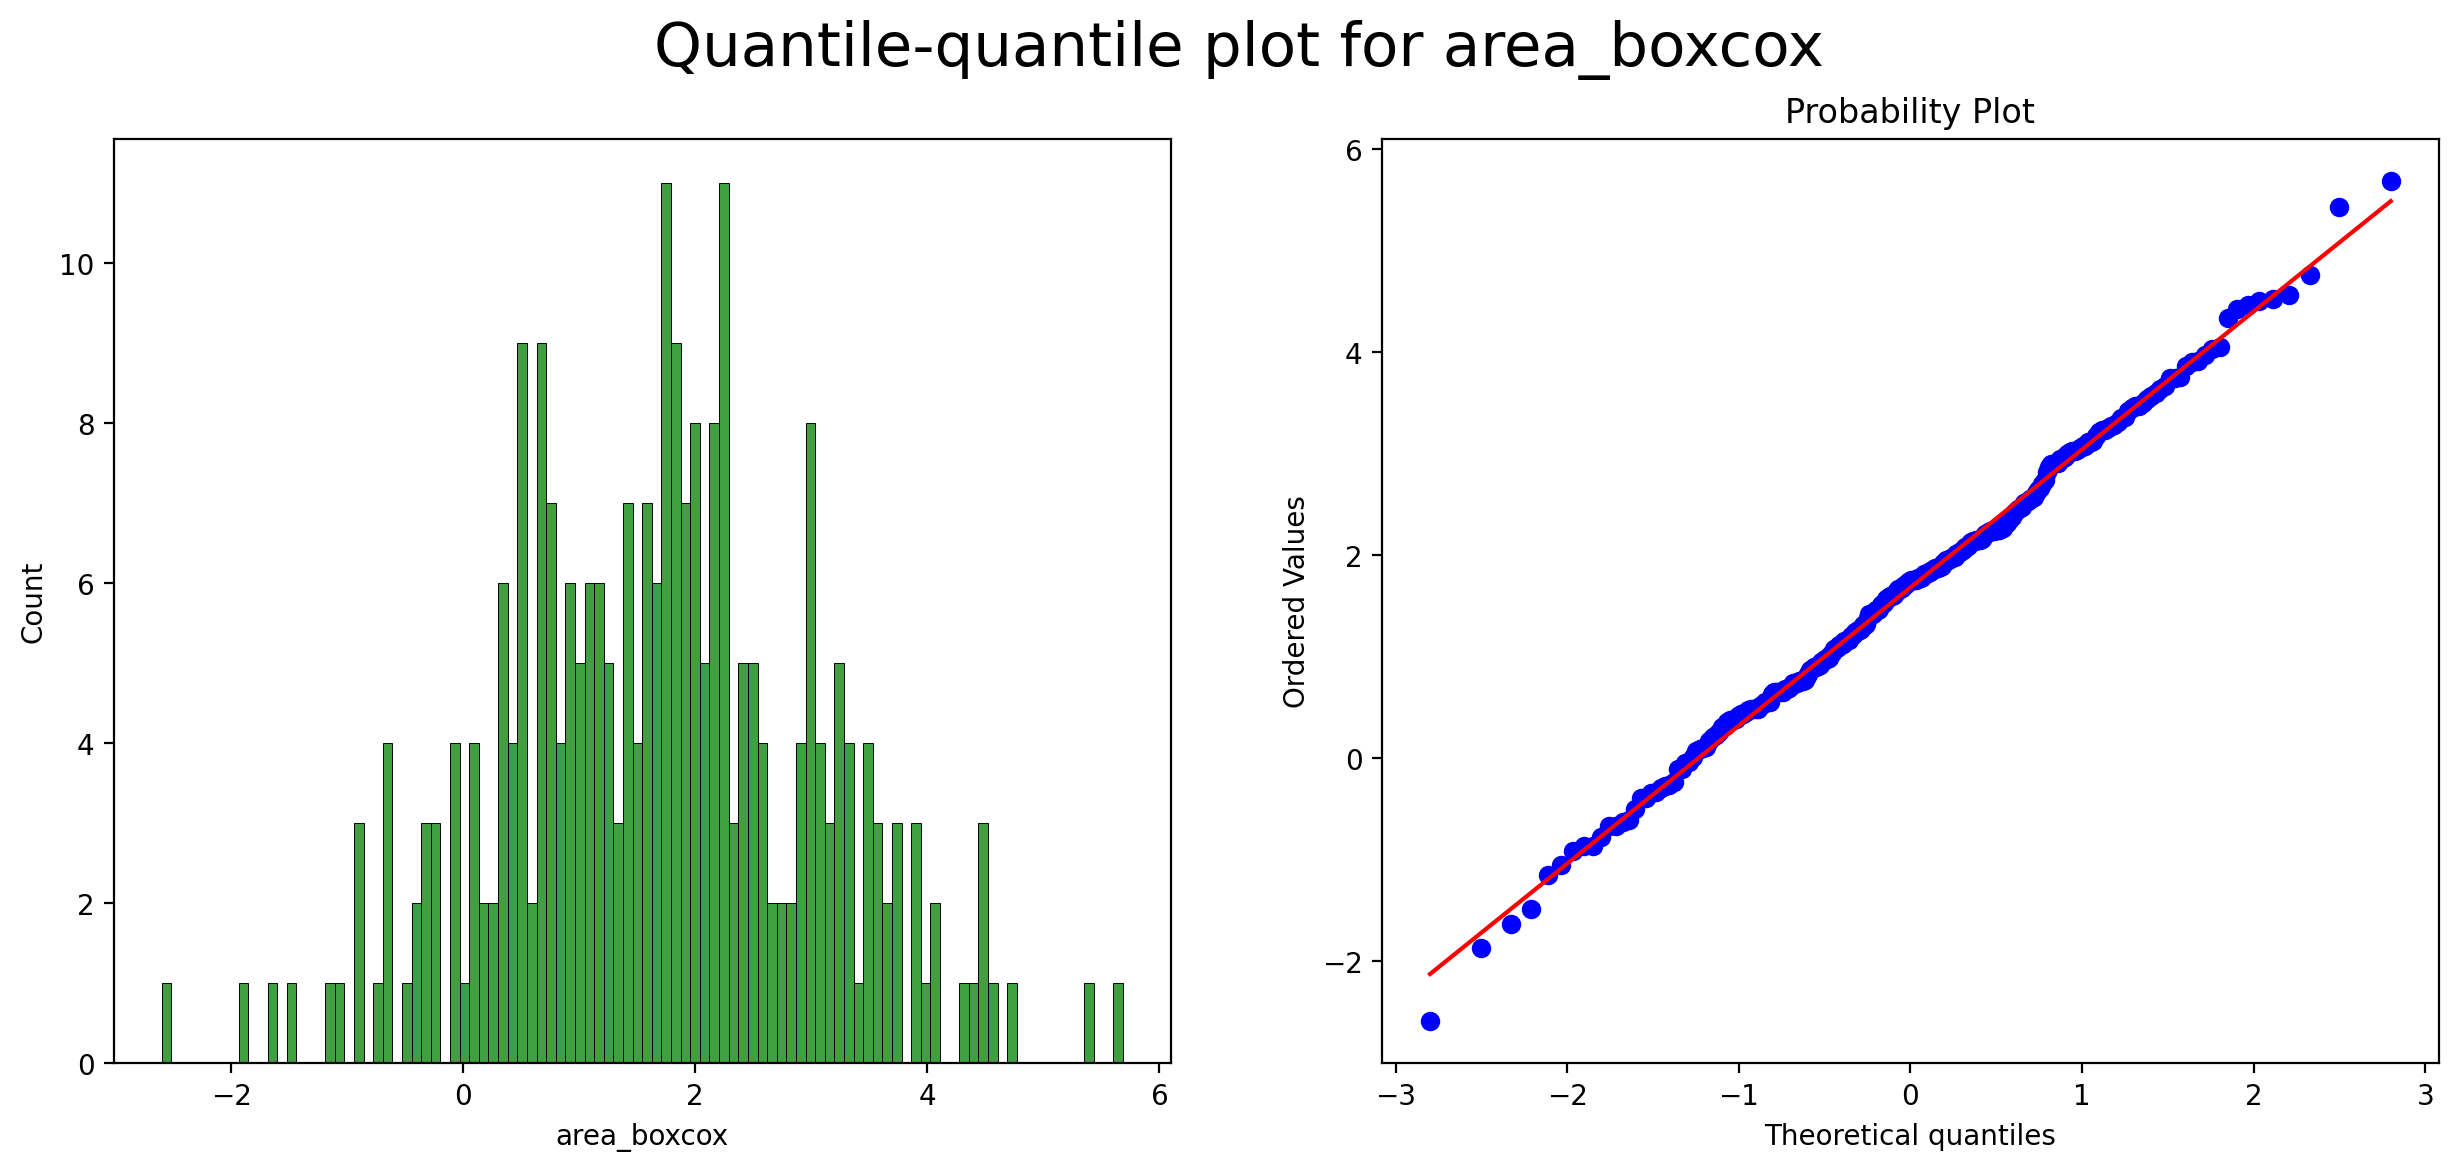

In [222]:
d_n0['area_boxcox'], _ = stats.boxcox(d_n0['area'])

print(f"Skewness: {round(d_n0['area_boxcox'].skew(), 4)}")
print(f"Kurtosis: {round(d_n0['area_boxcox'].kurt(), 4)}")

trans.append("Box-Cox")
skew.append(round(d_n0['area_boxcox'].skew(), 4))
kurt.append(round(d_n0['area_boxcox'].kurt(), 4))

diagnostic_plots(d_n0, 'area_boxcox')

In [223]:
trans_result = pd.DataFrame({
    "Transformation": trans,
    "Skewness": skew,
    "Kurtosis": kurt
})

trans_result

,Transformation,Skewness,Kurtosis
0,Log,0.2998,0.3012
1,Reciprocal,6.8248,63.9071
2,SQRT,4.0973,25.1297
3,CUBE,2.4498,9.8399
4,YJ,0.0800,-0.6682
5,Box-Cox,-0.0036,0.1523


## Features transformation

In [224]:
col = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']

In [225]:
trans = []
skew = []
kurt = []

for c in col:
    d_n0[f'{c}_boxcox'], _ = stats.boxcox(d_n0[f'{c}'])

    trans.append(f'{c}_original')
    skew.append(round(d_n0[f'{c}'].skew(), 4))
    kurt.append(round(d_n0[f'{c}'].kurt(), 4))

    trans.append(f'{c}_boxcox')
    skew.append(round(d_n0[f'{c}_boxcox'].skew(), 4))
    kurt.append(round(d_n0[f'{c}_boxcox'].kurt(), 4))

    trans.append('')
    skew.append('')
    kurt.append('')

trans_result = pd.DataFrame({
    "Transformation": trans,
    "Skewness": skew,
    "Kurtosis": kurt
})

trans_result

,Transformation,Skewness,Kurtosis
0,FFMC_original,-2.7057,13.1432
1,FFMC_boxcox,-0.0699,0.1548
2,,,
3,DMC_original,0.5353,0.5121
4,DMC_boxcox,-0.0678,0.1176
5,,,
6,DC_original,-1.2721,0.4261
7,DC_boxcox,-0.8436,-0.4115
8,,,
9,ISI_original,0.6694,0.3767


========== FFMC ==========


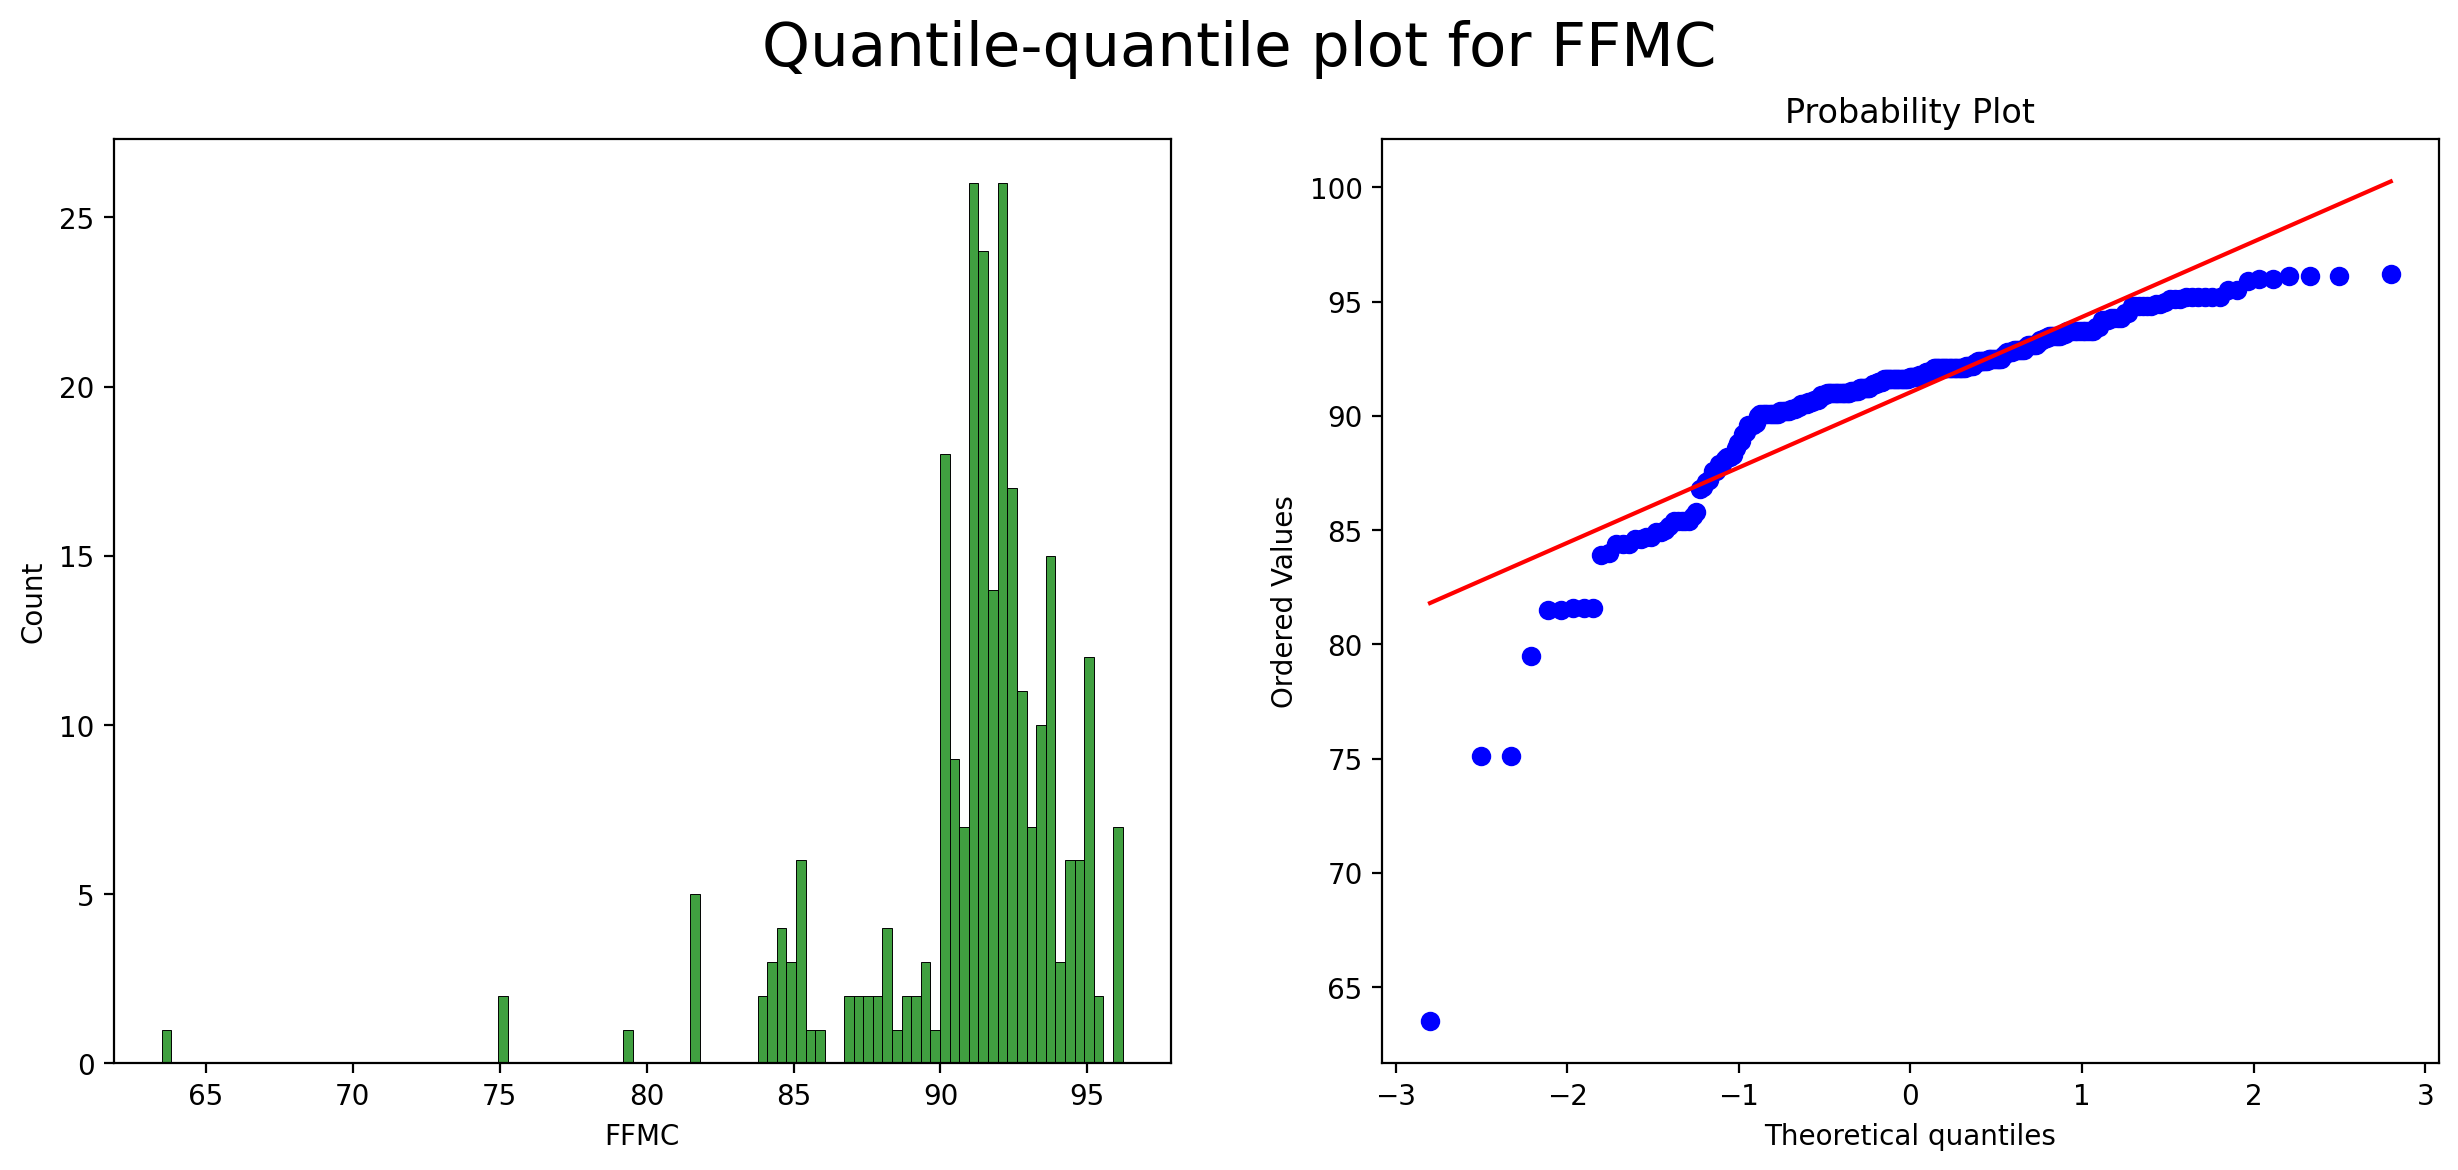

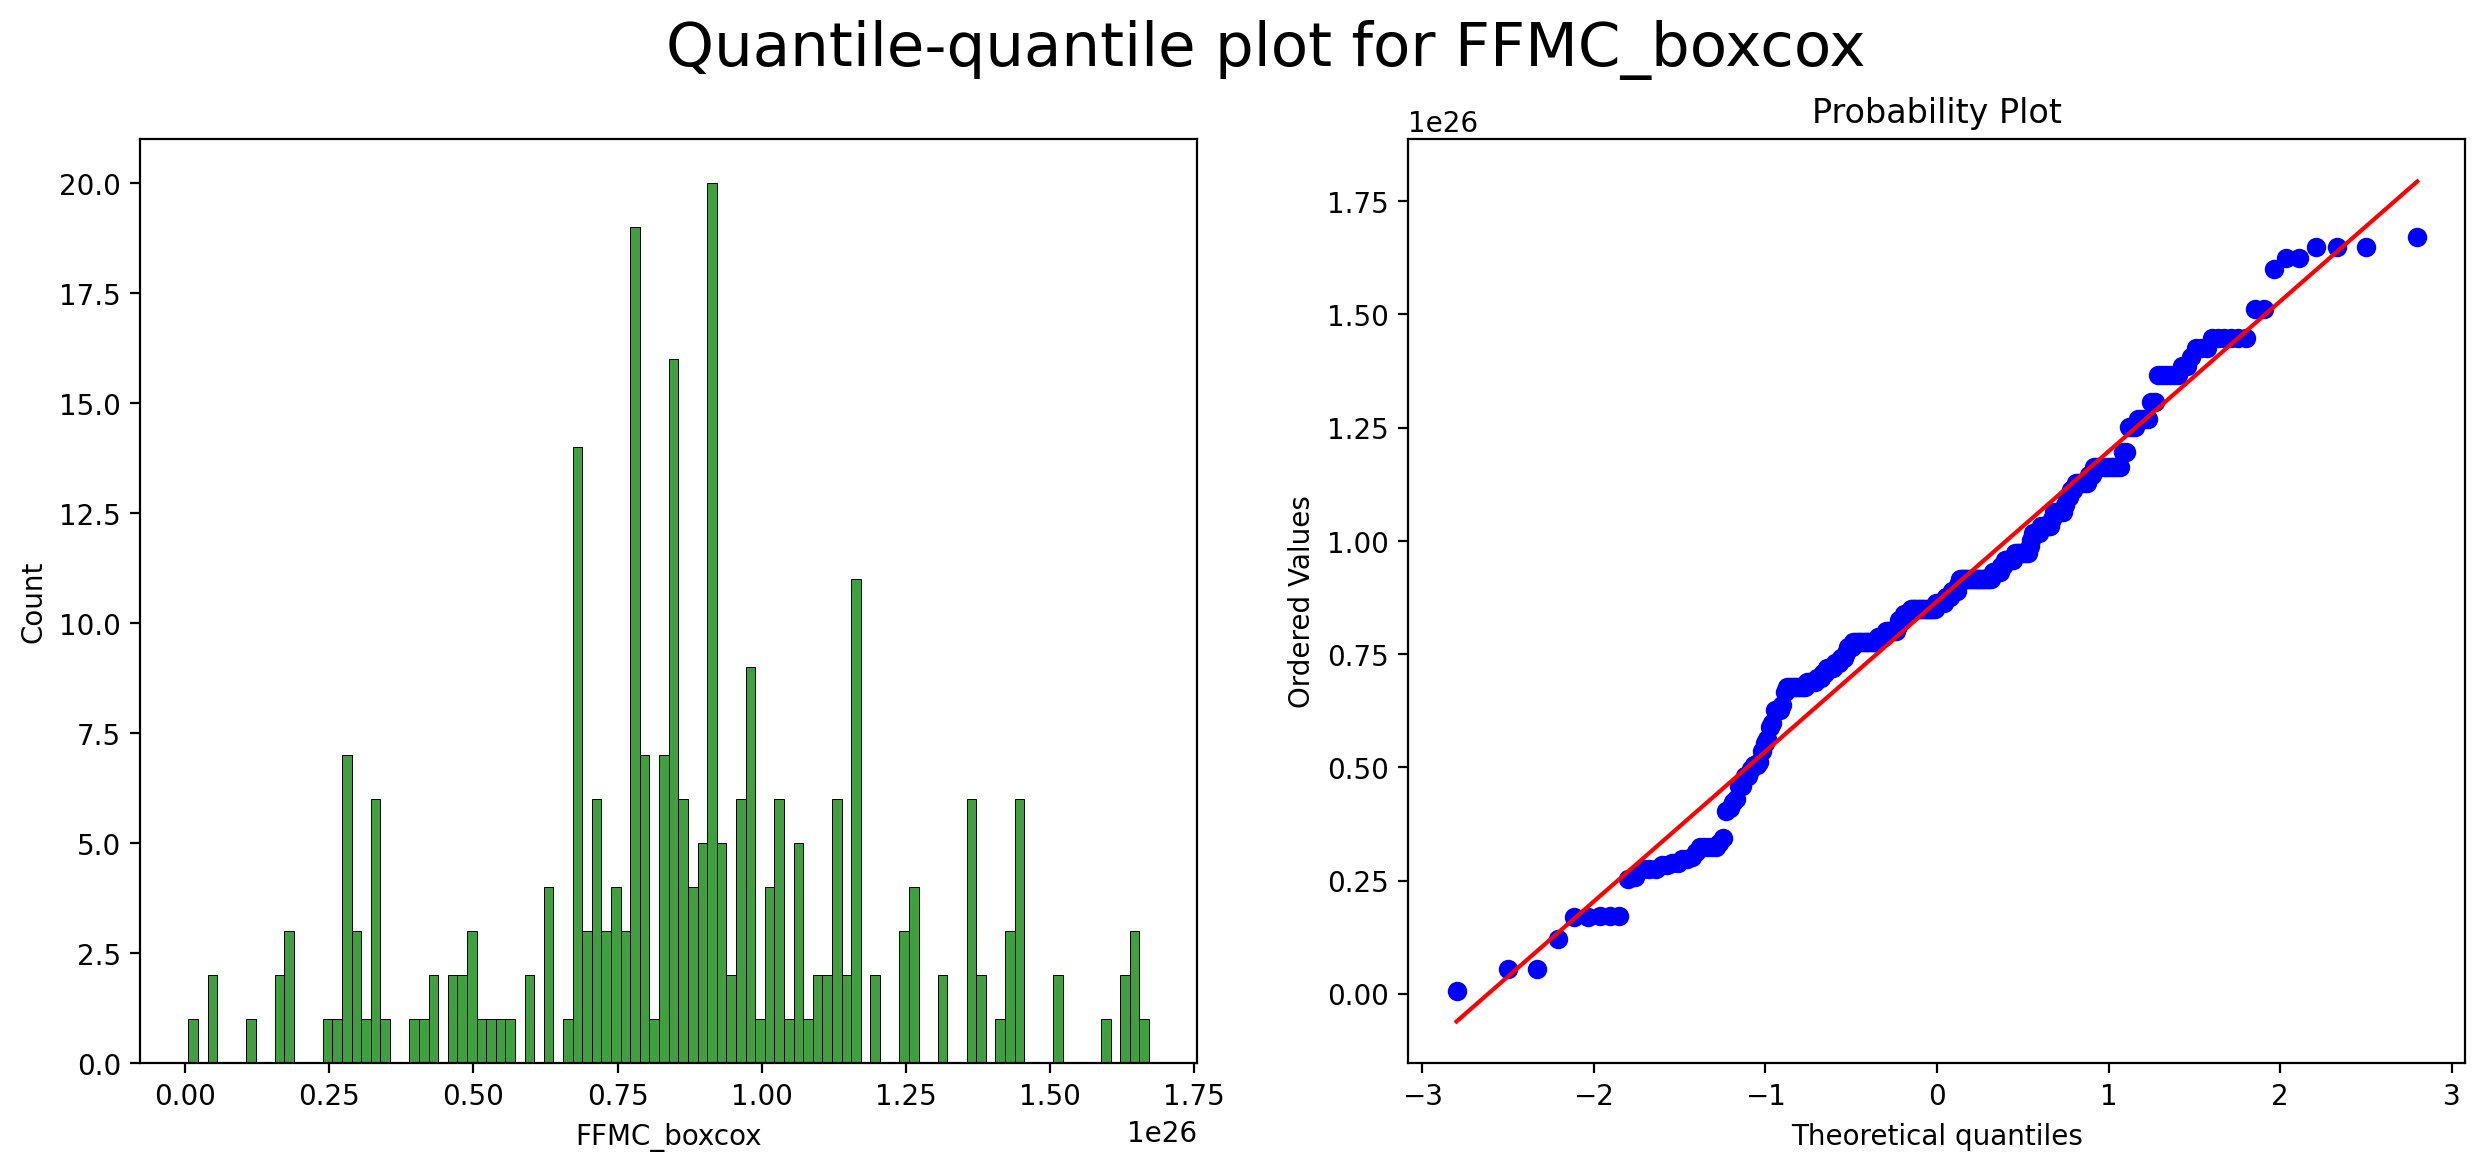

========== DMC ==========


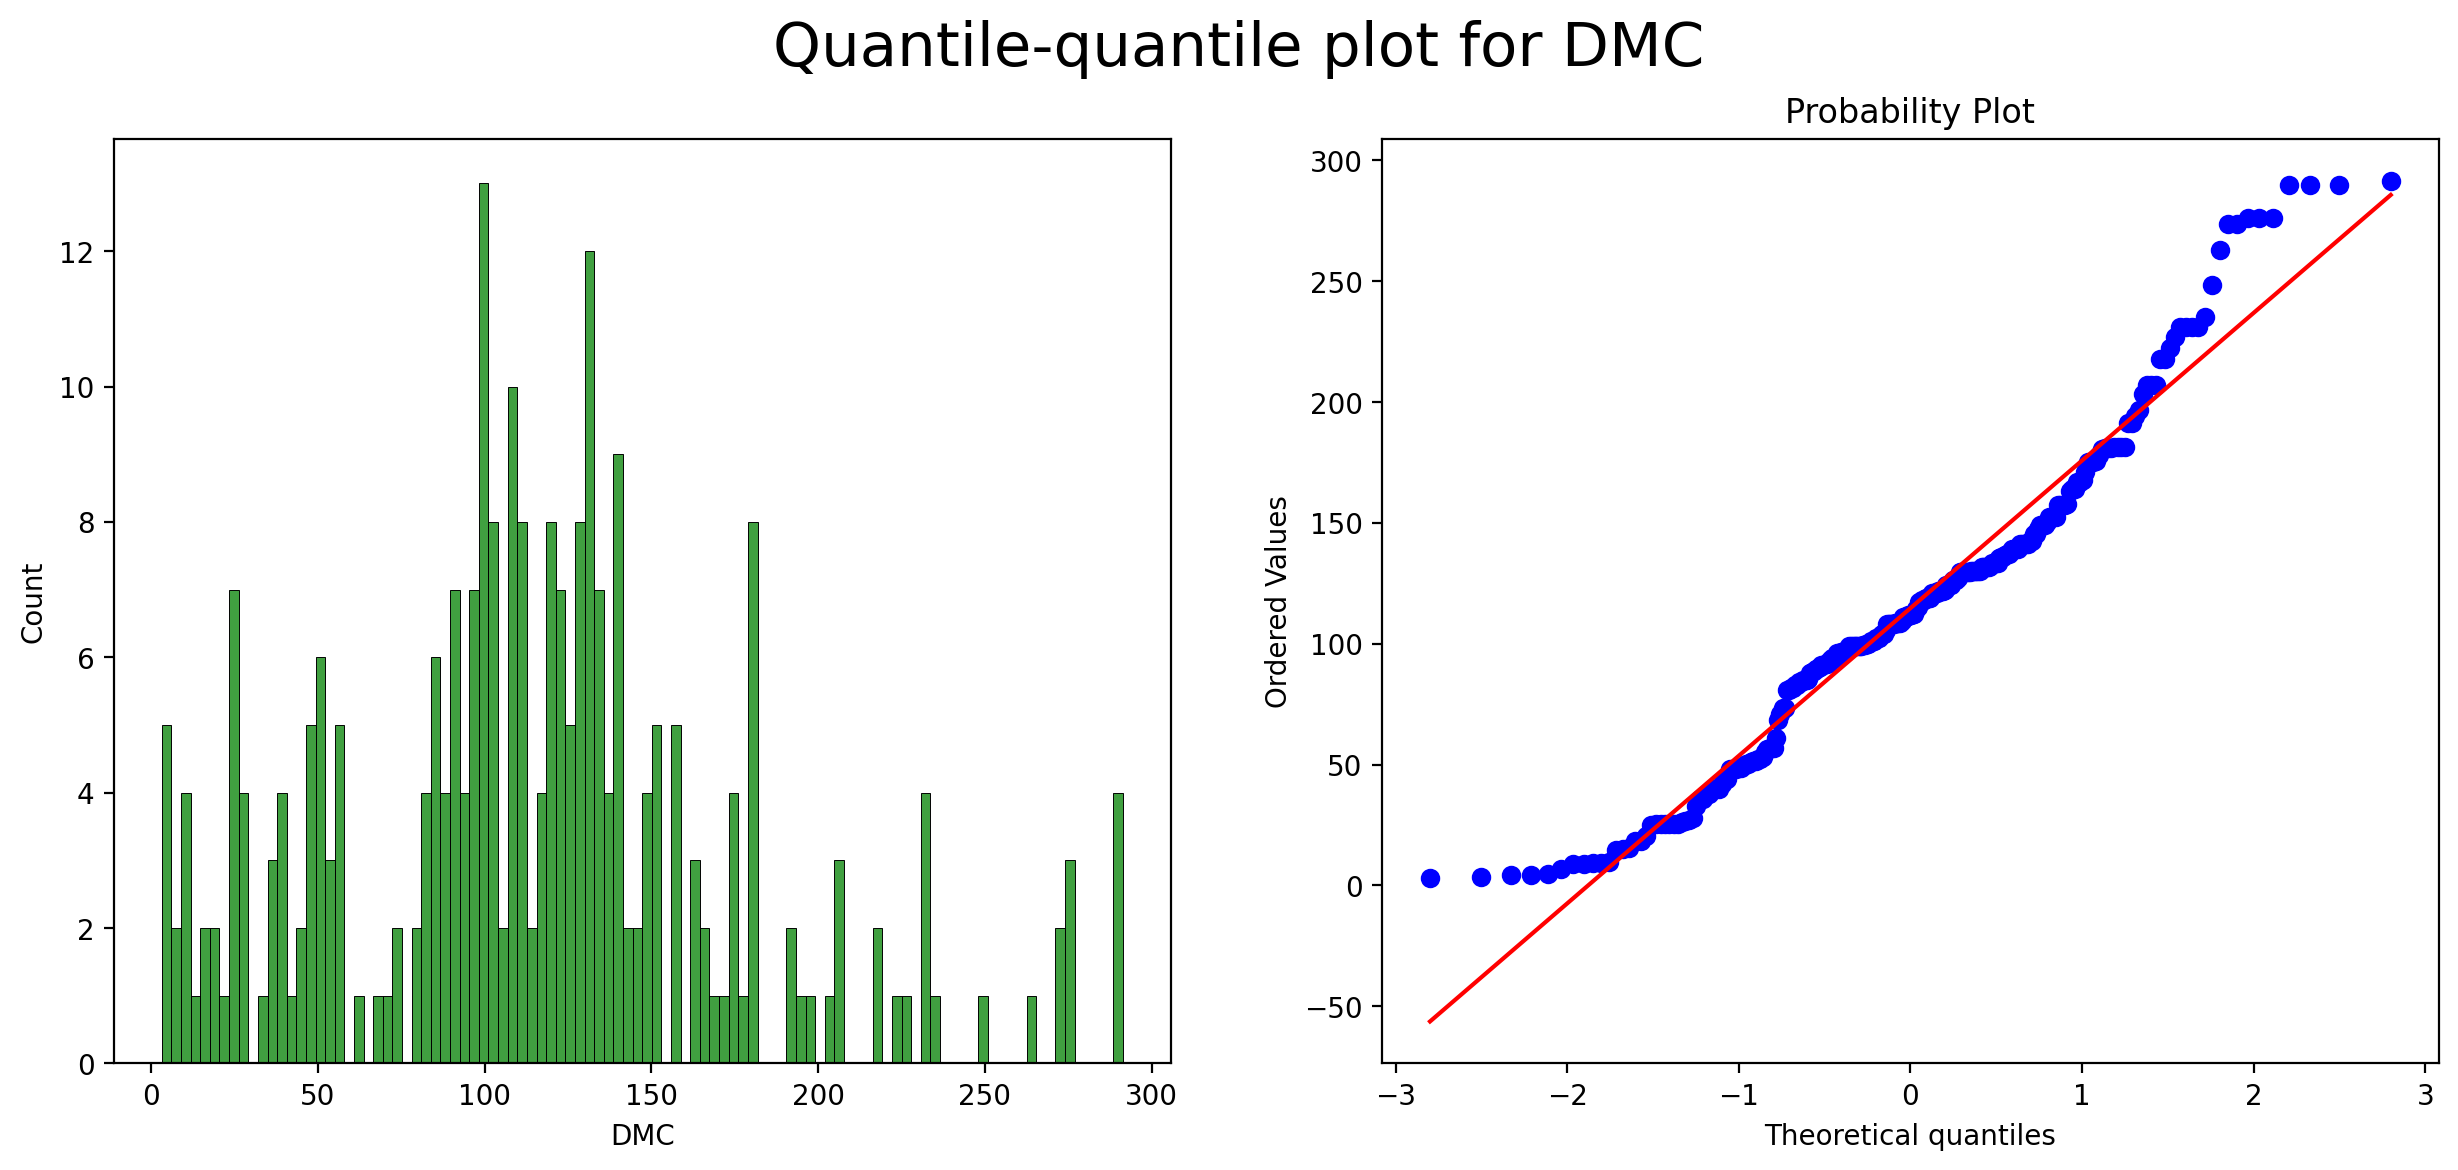

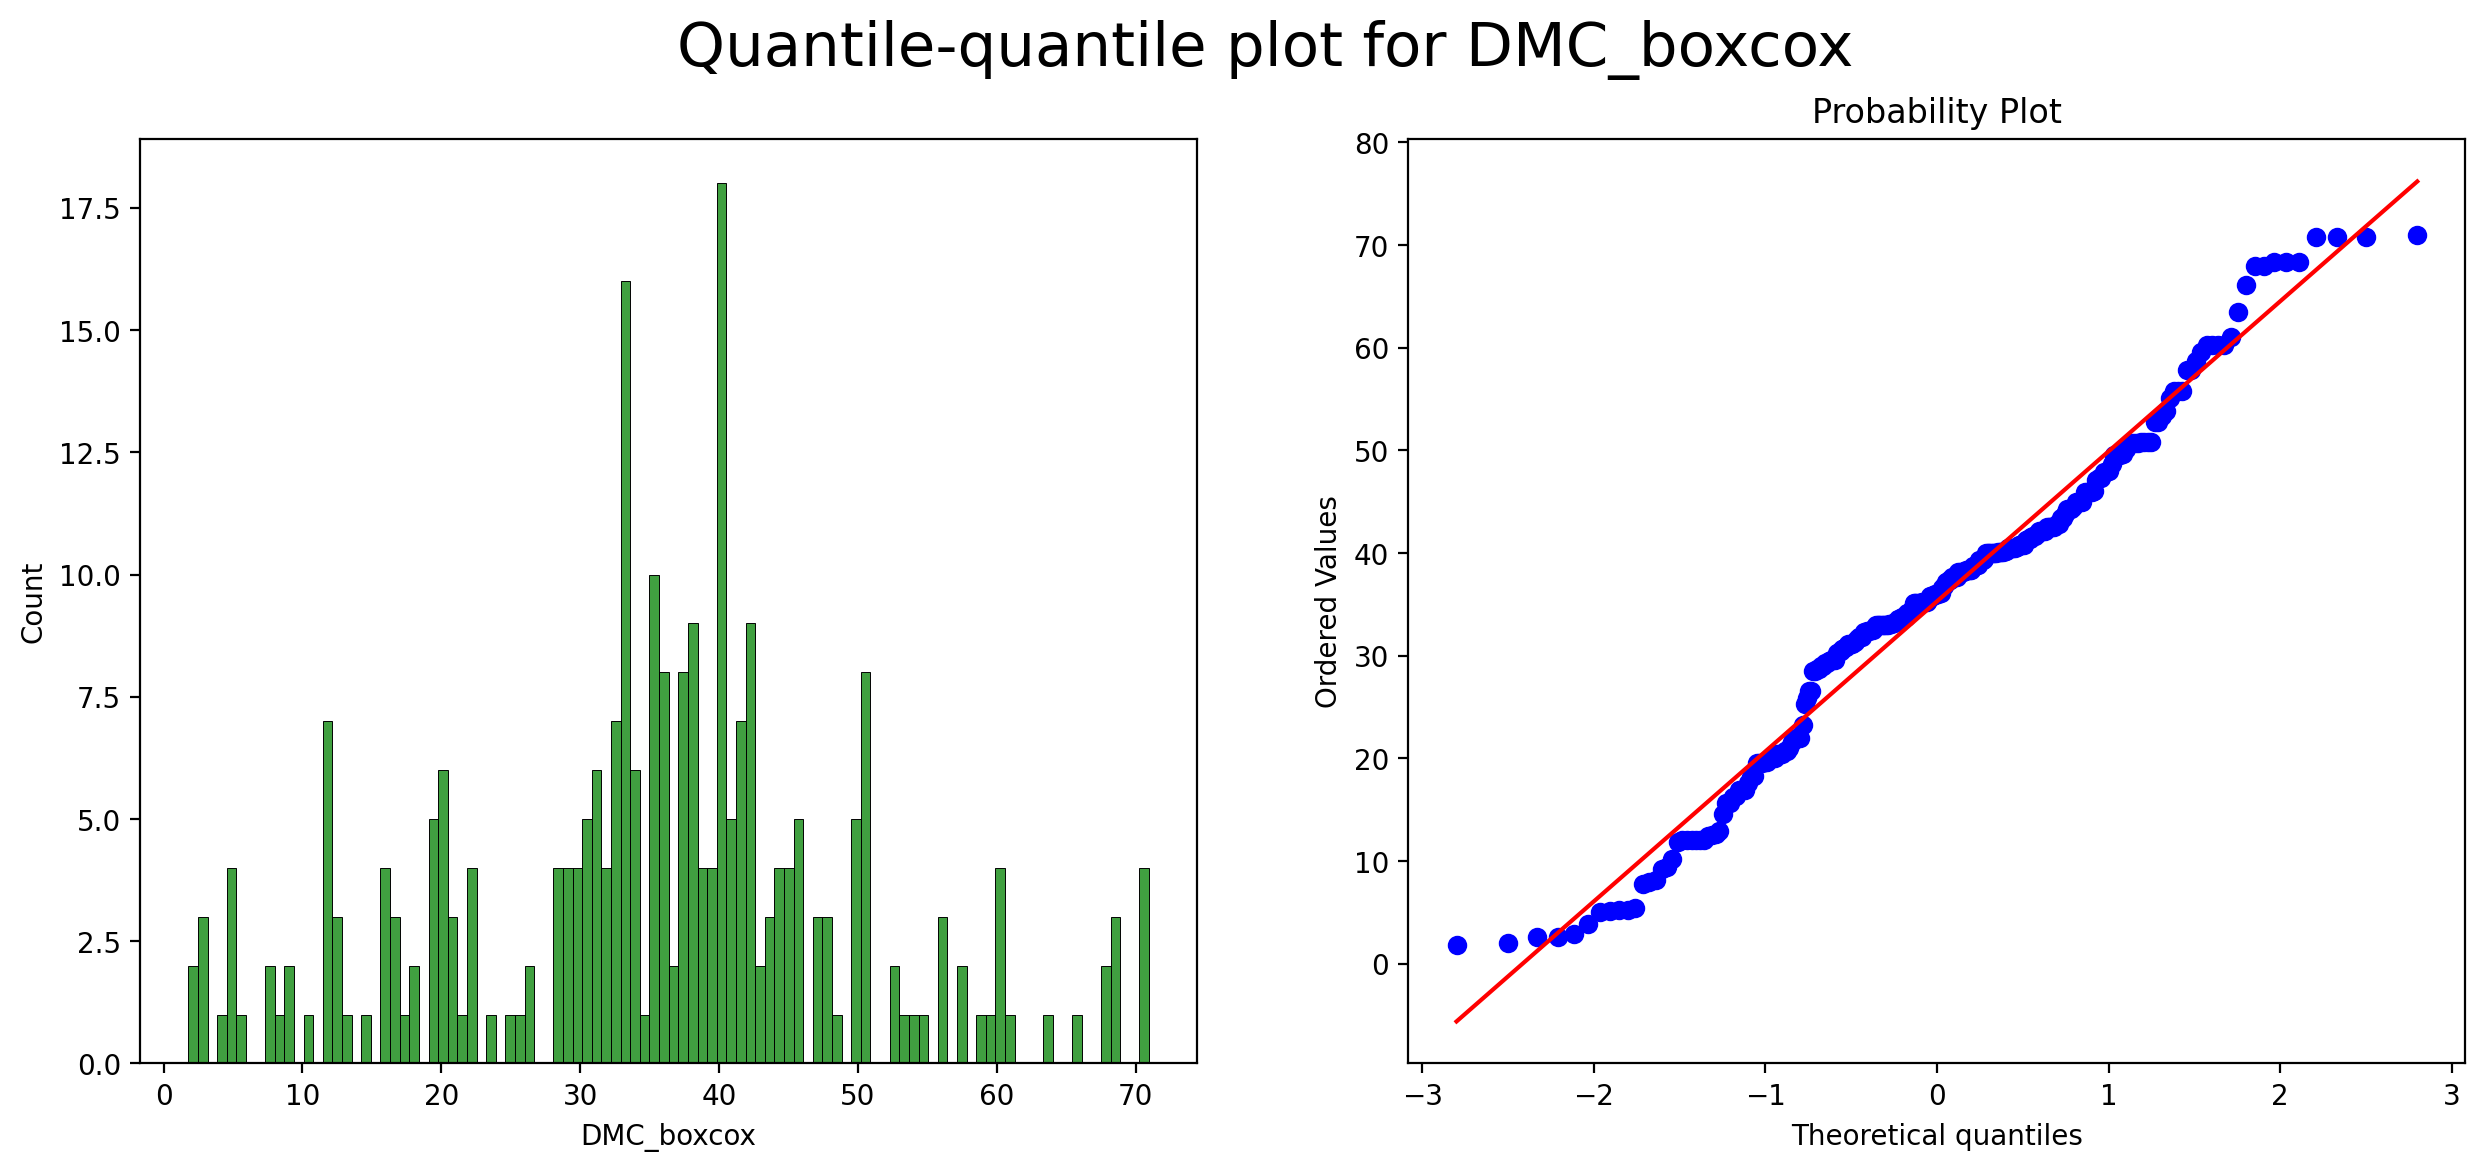

========== DC ==========


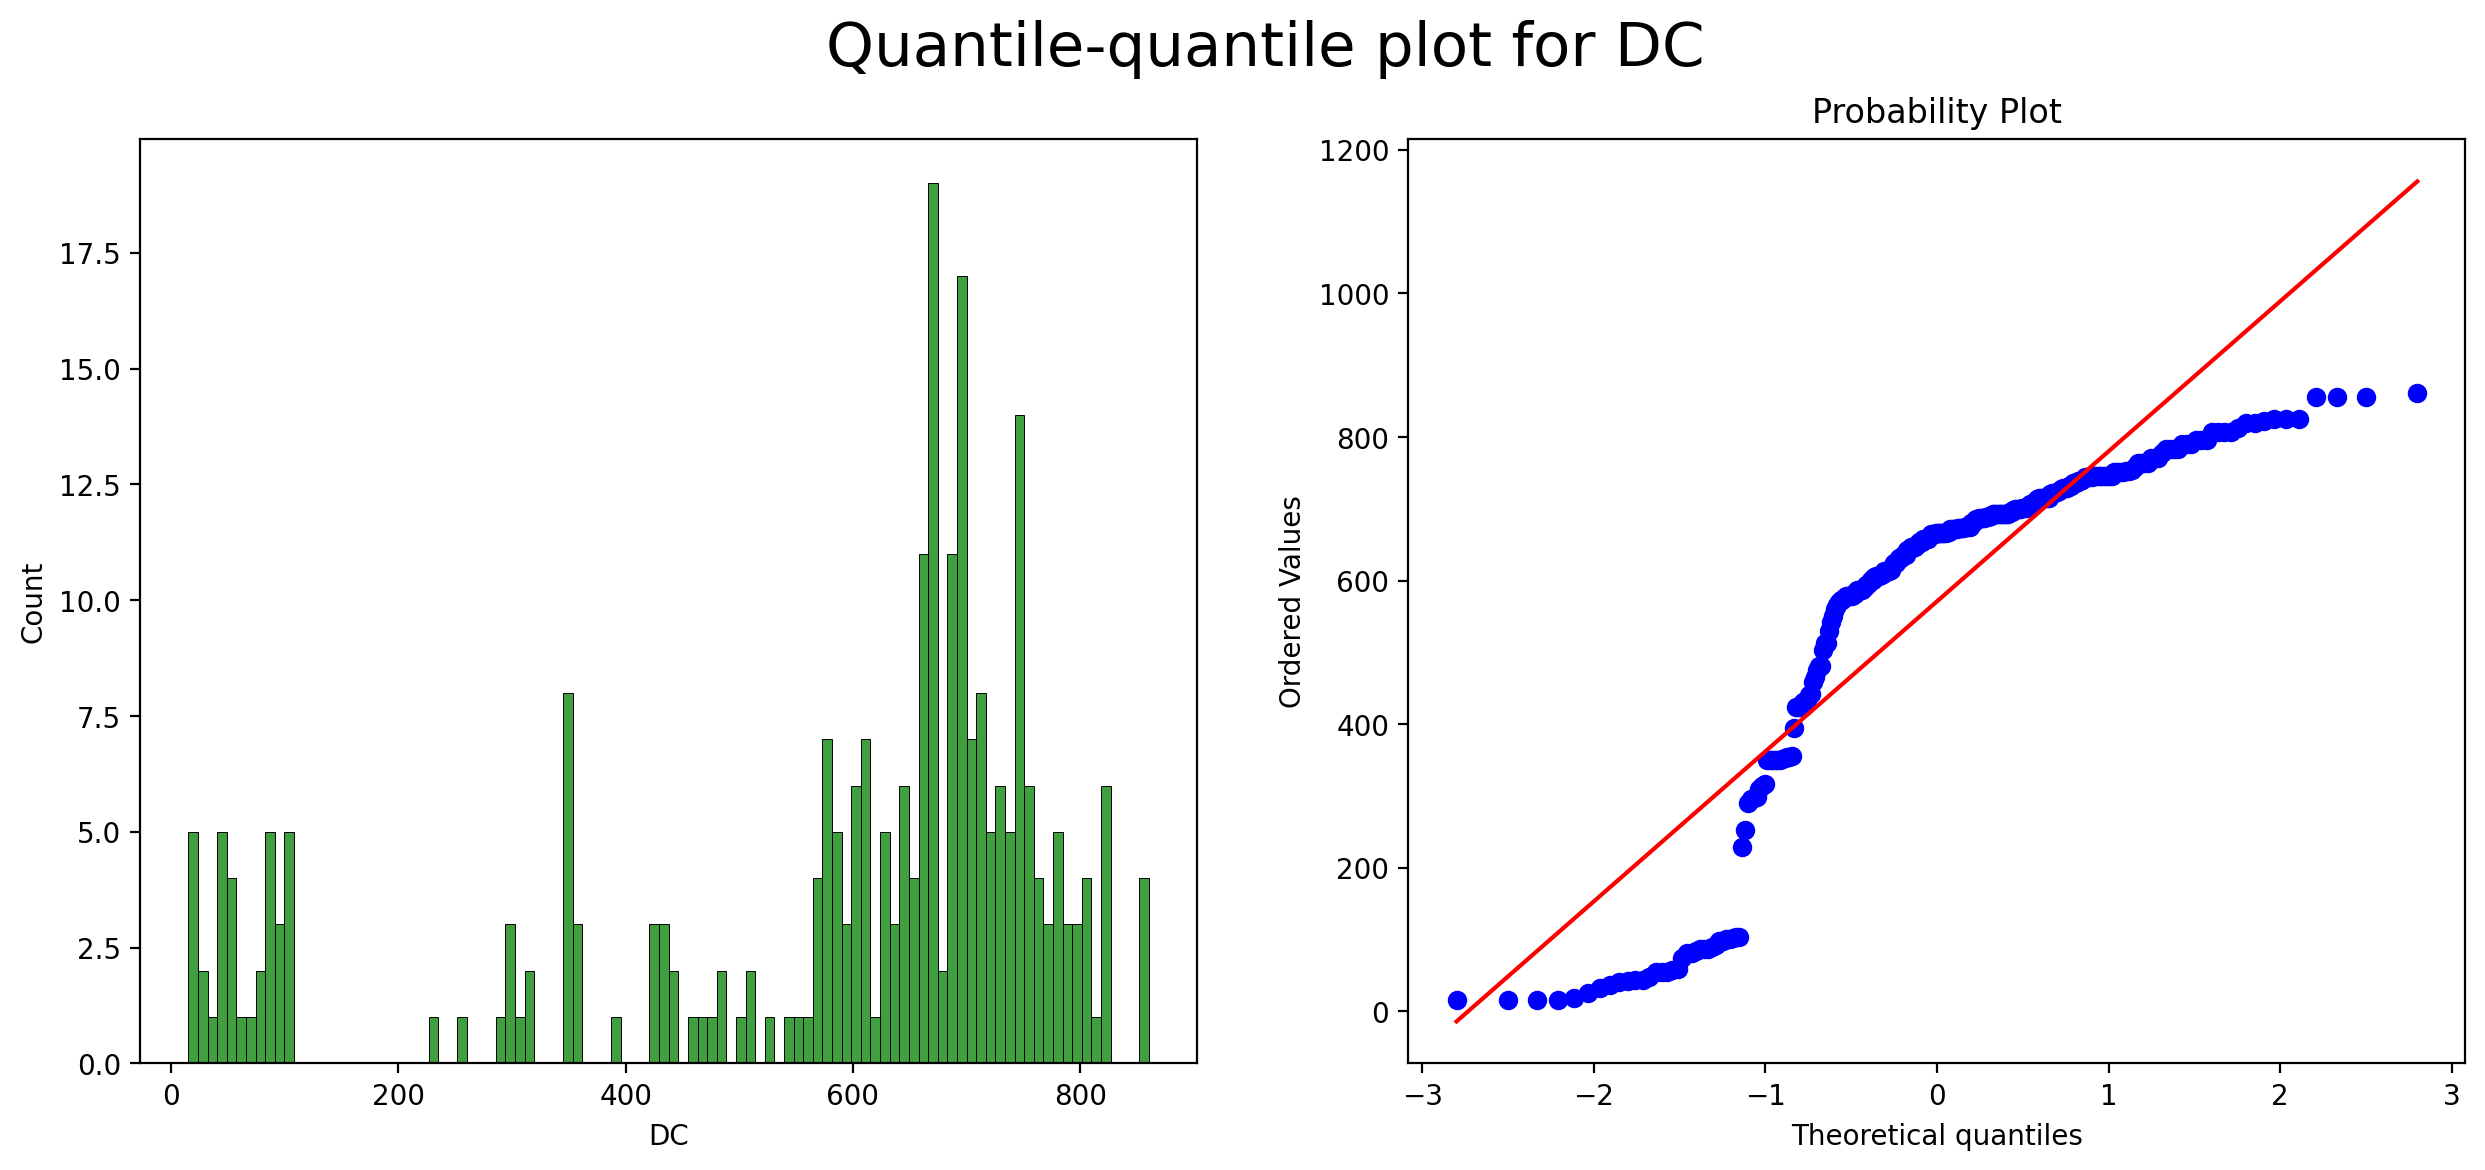

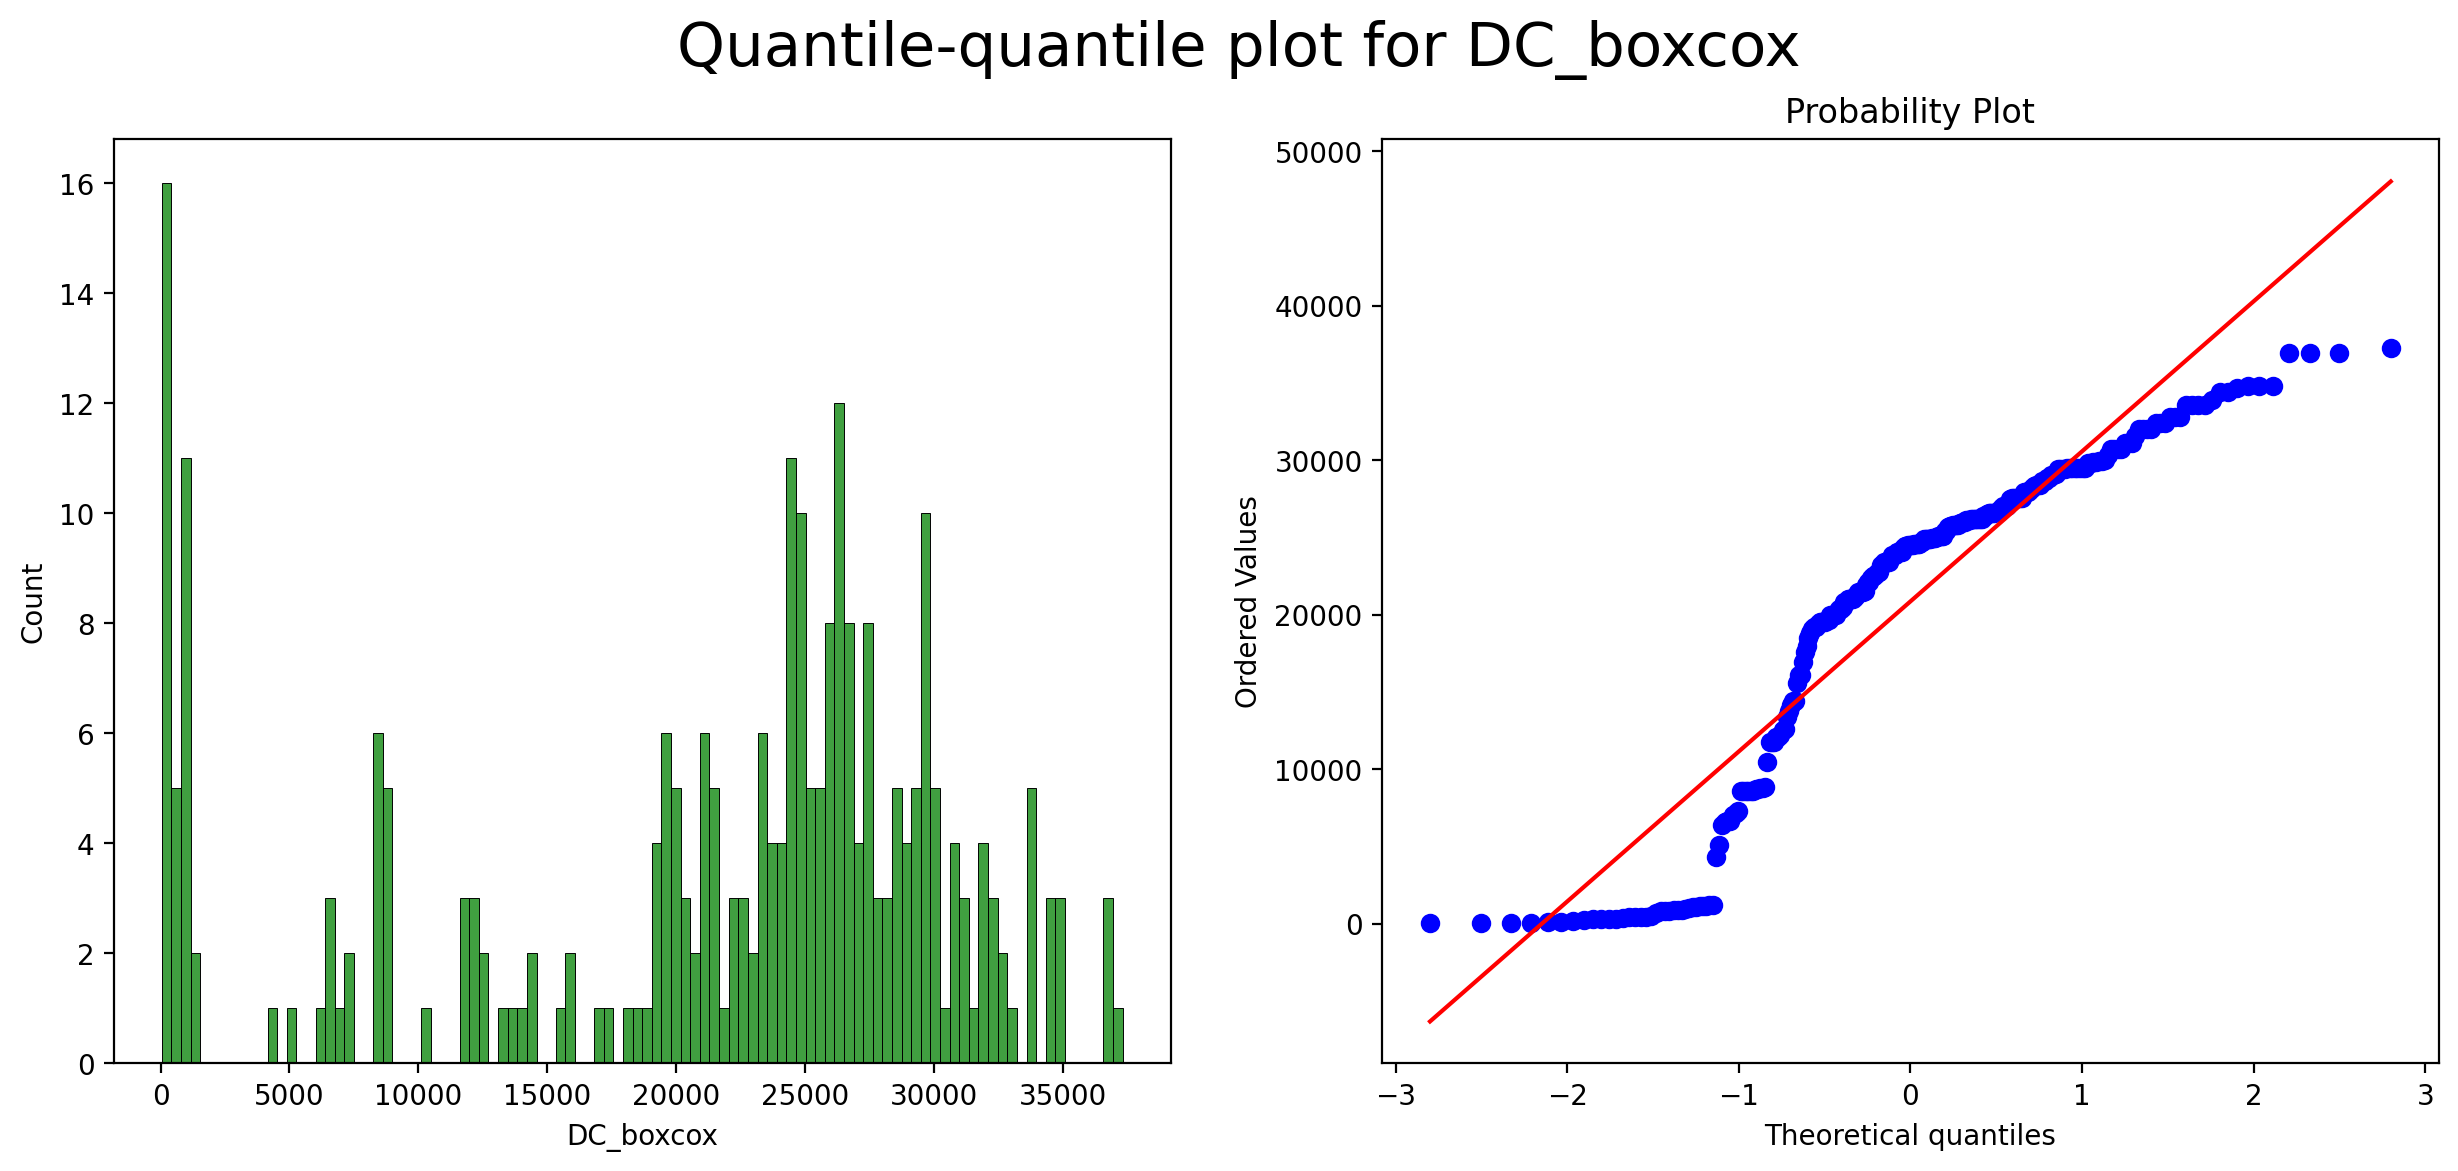

========== ISI ==========


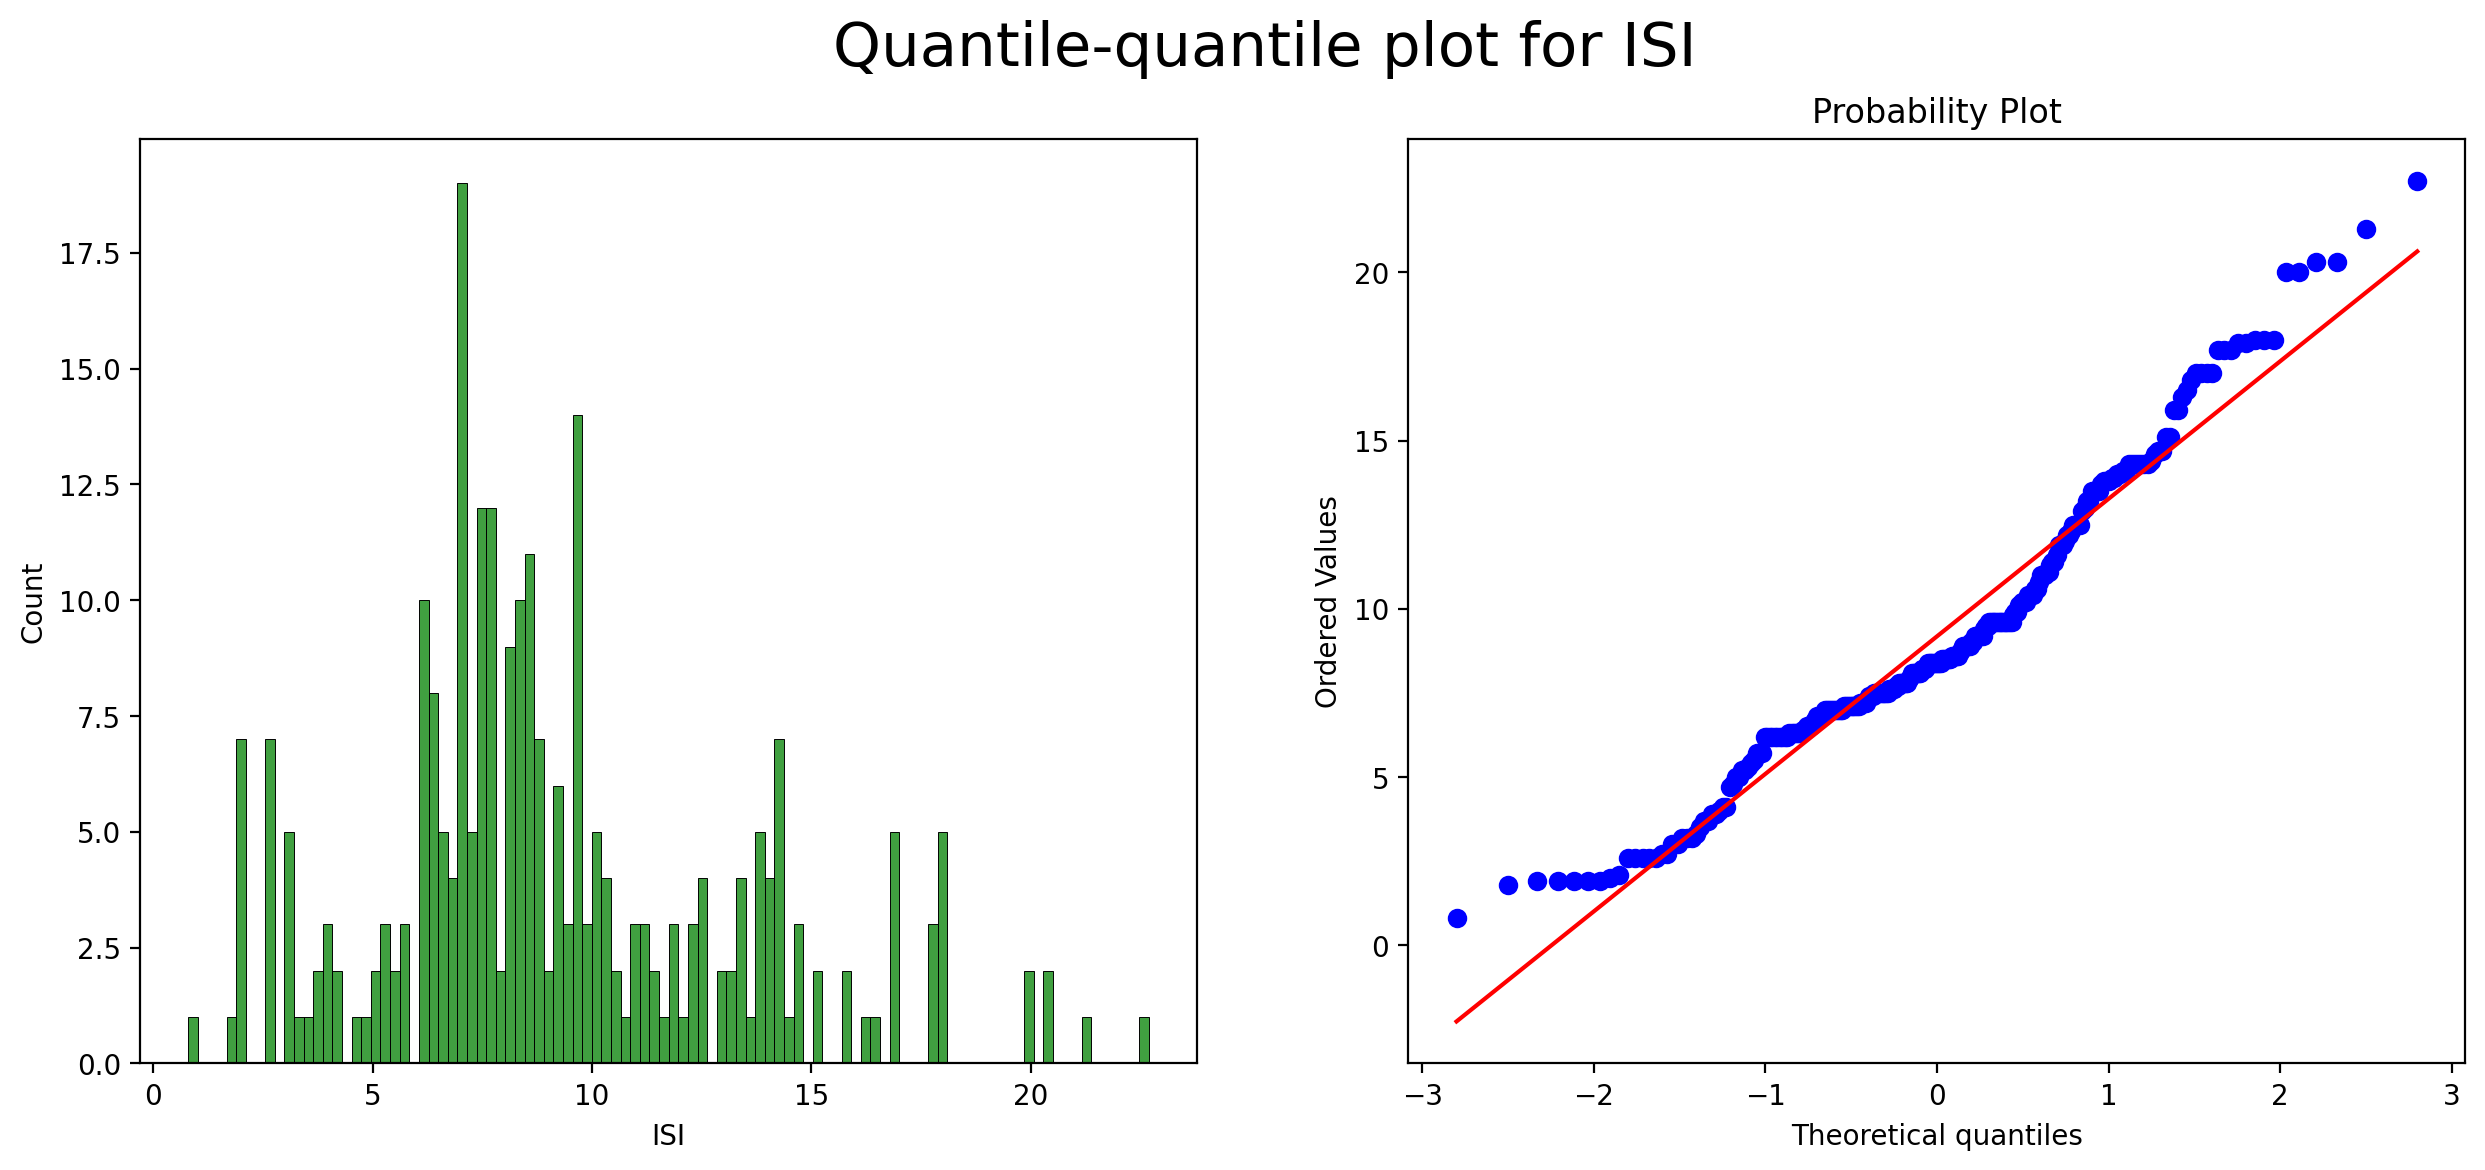

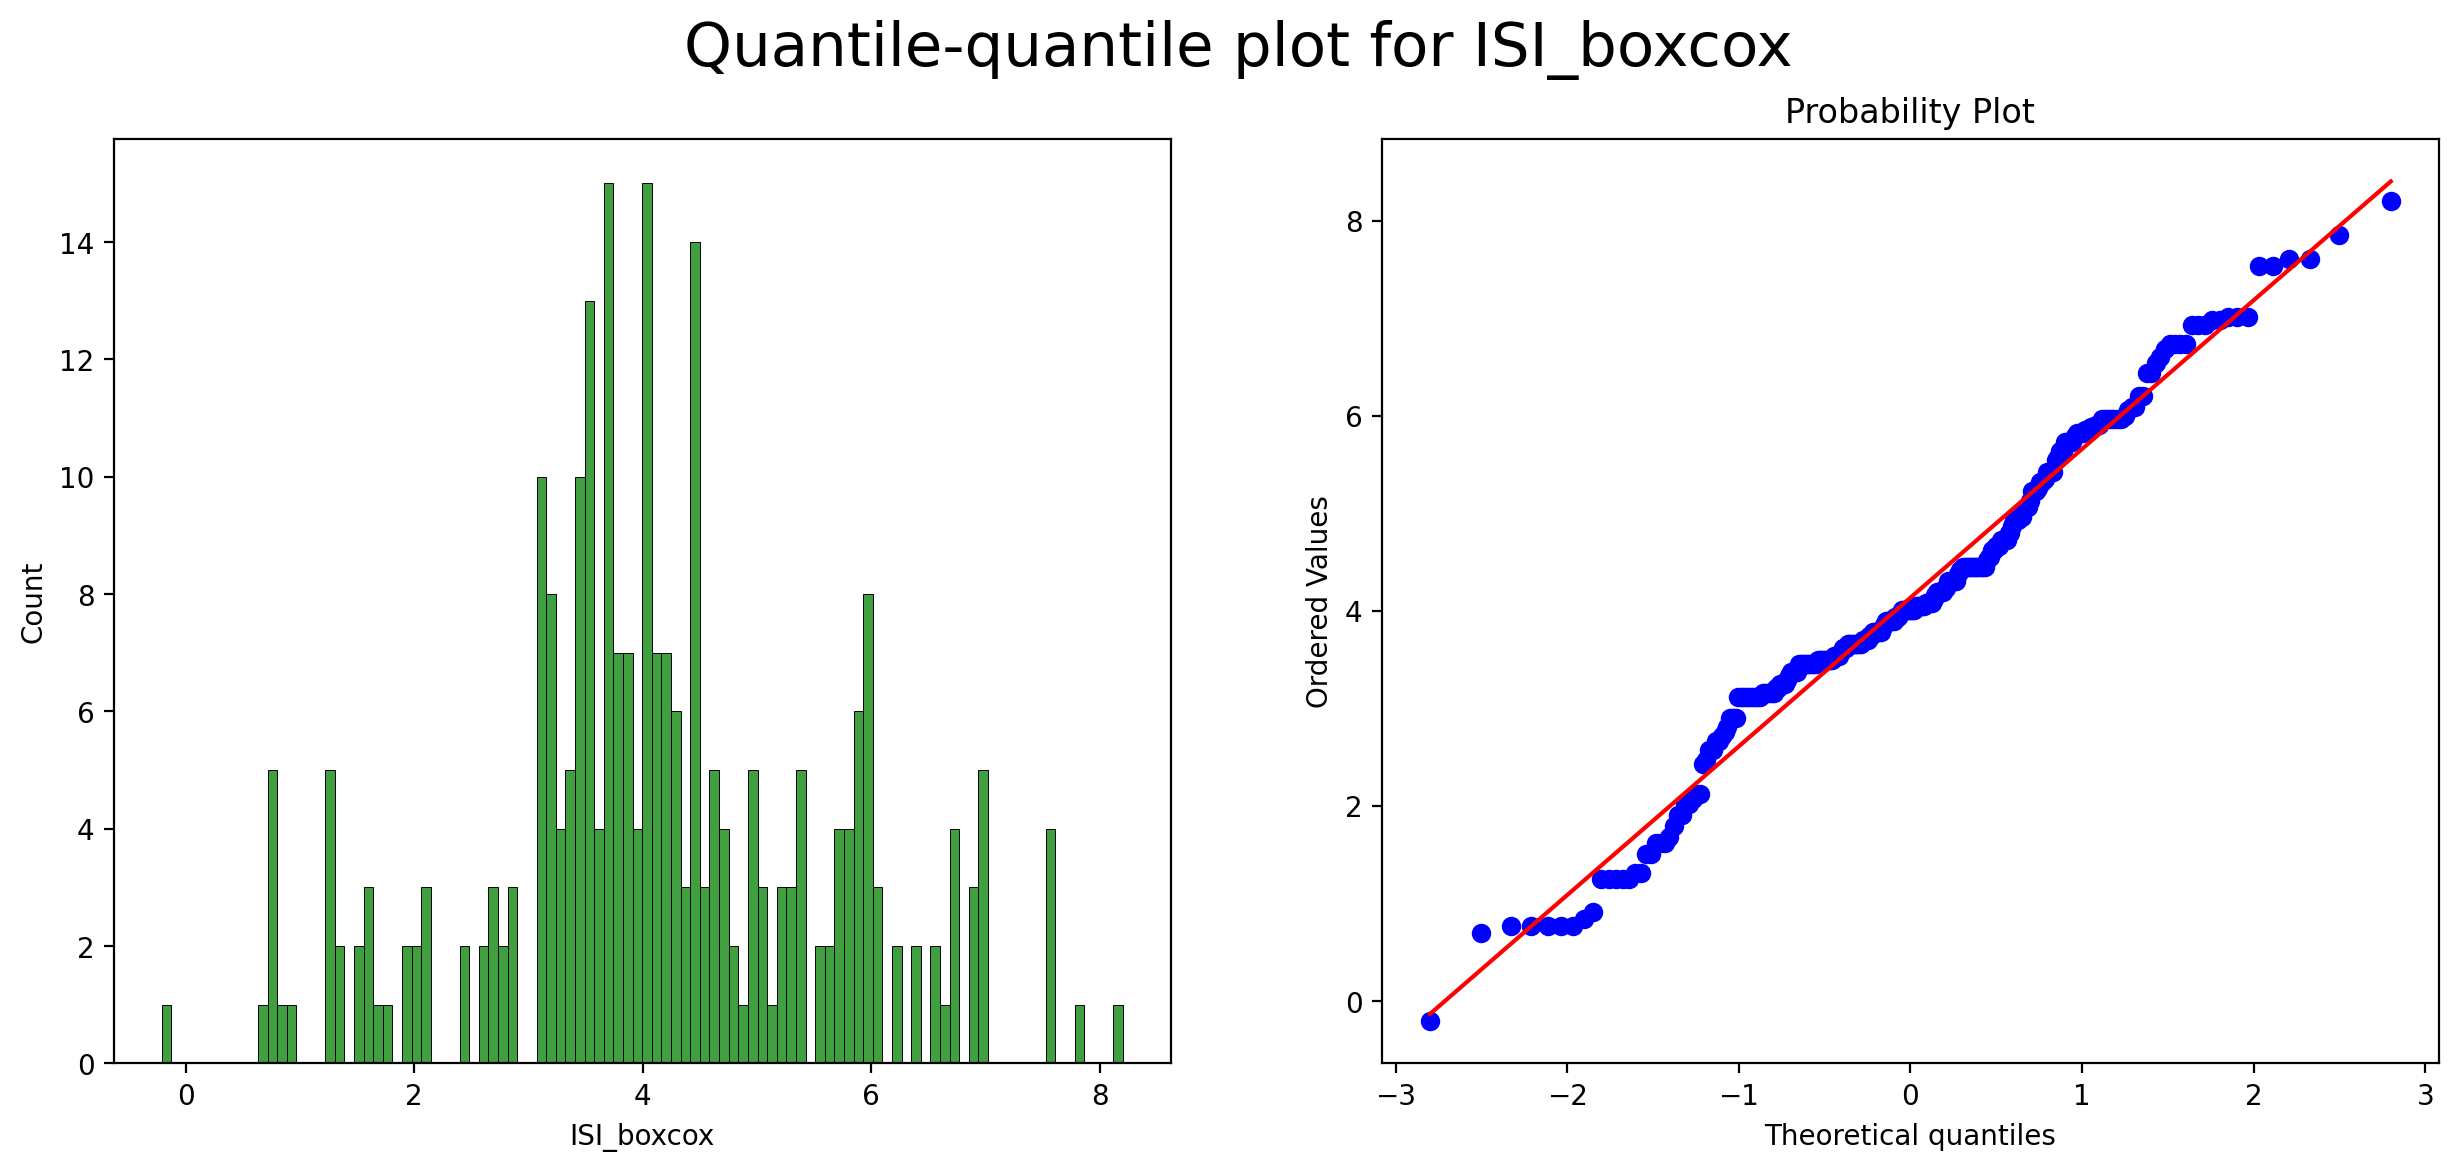

========== temp ==========


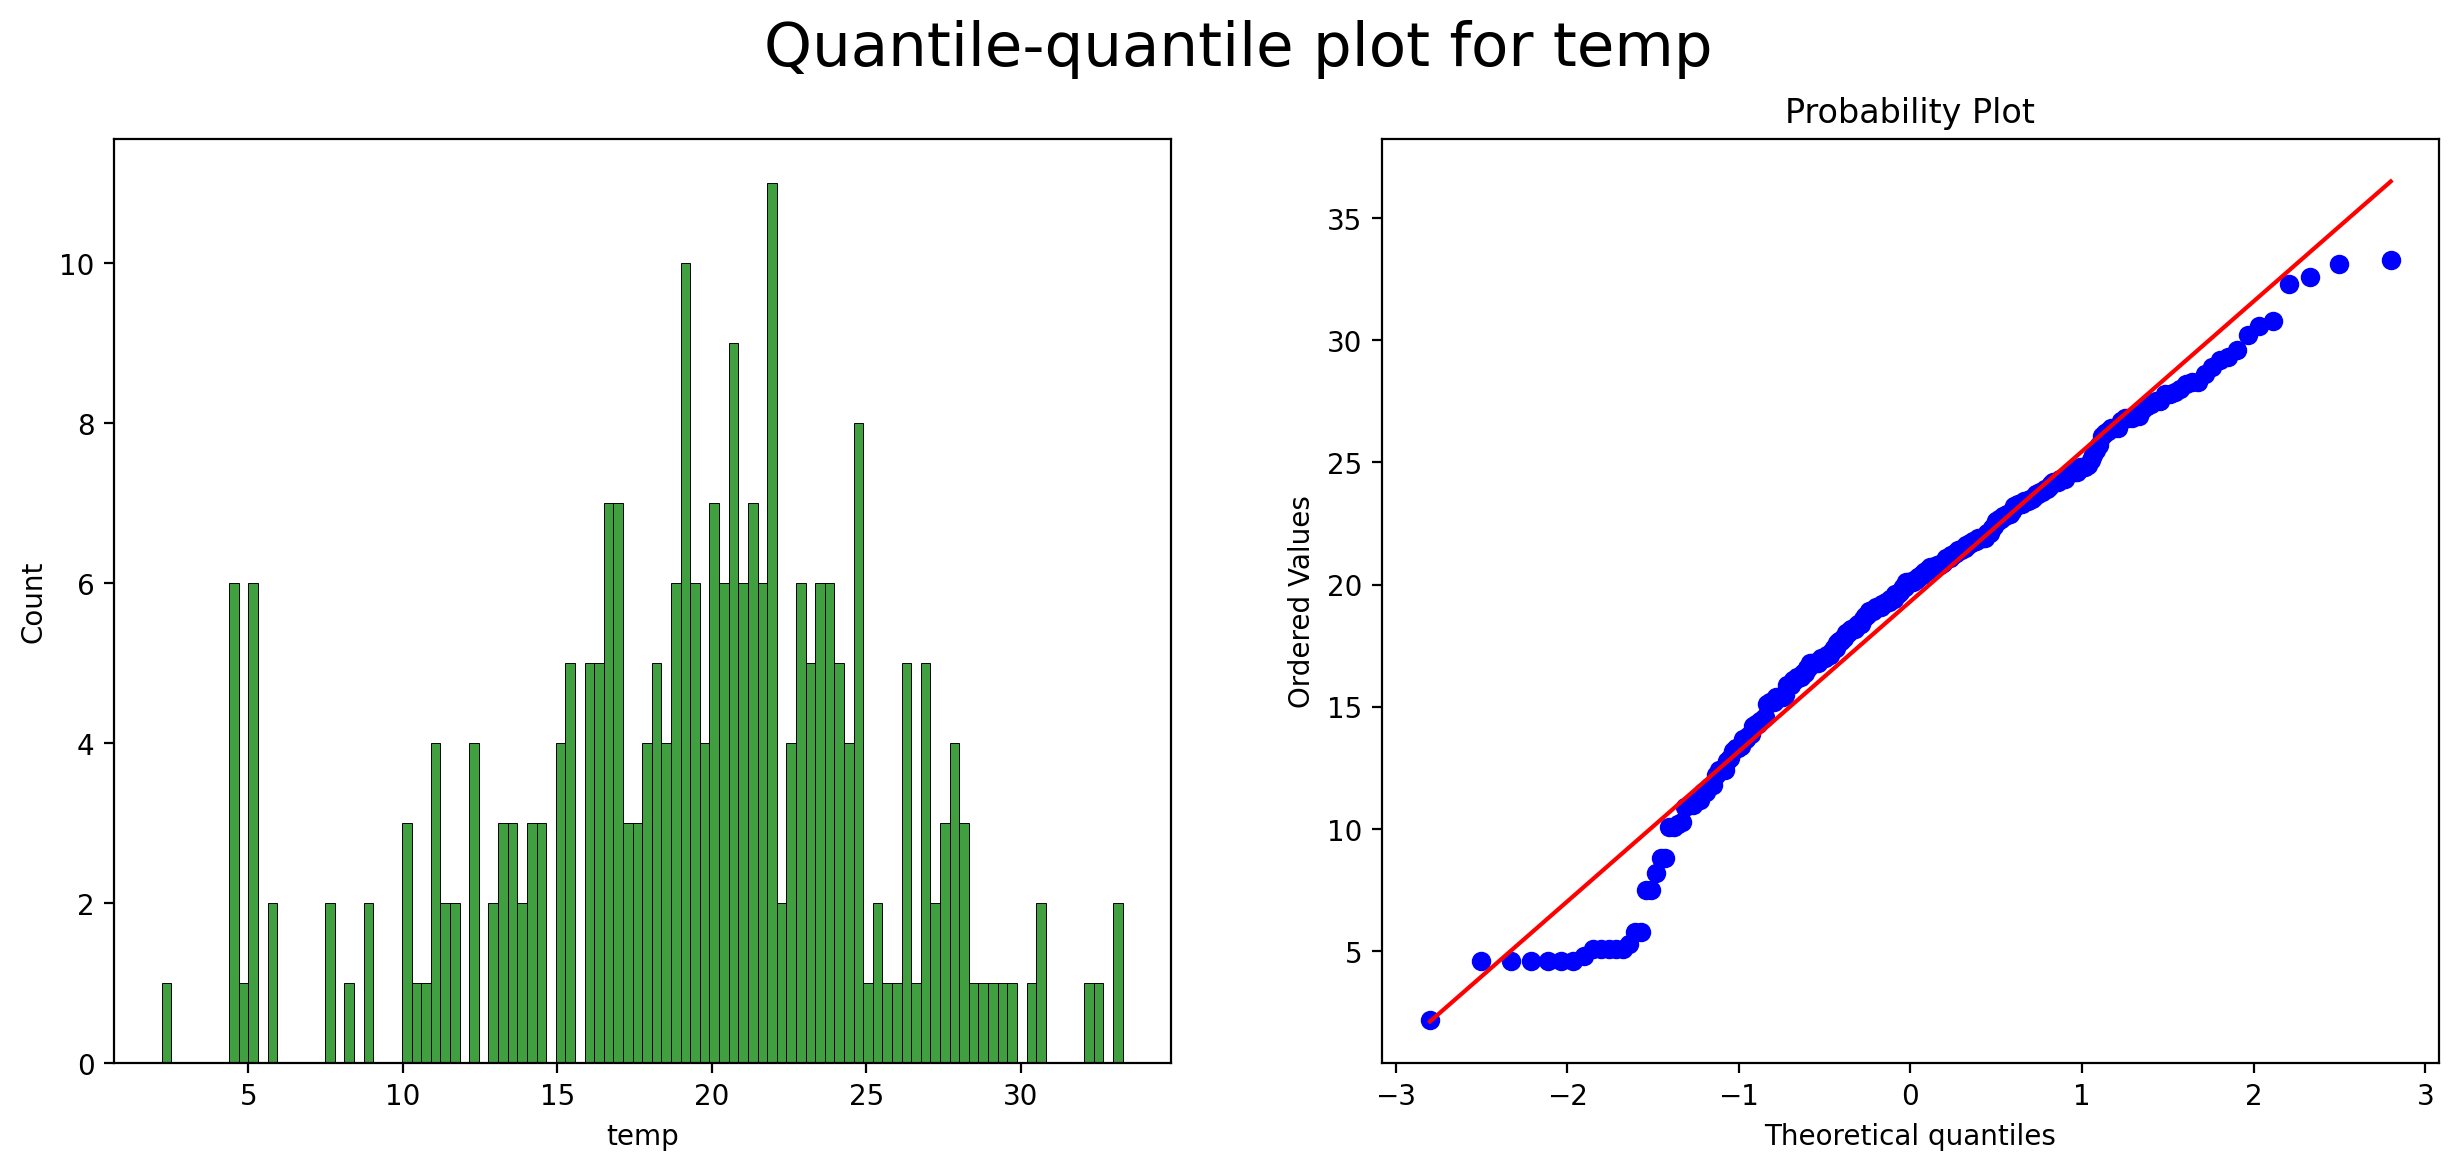

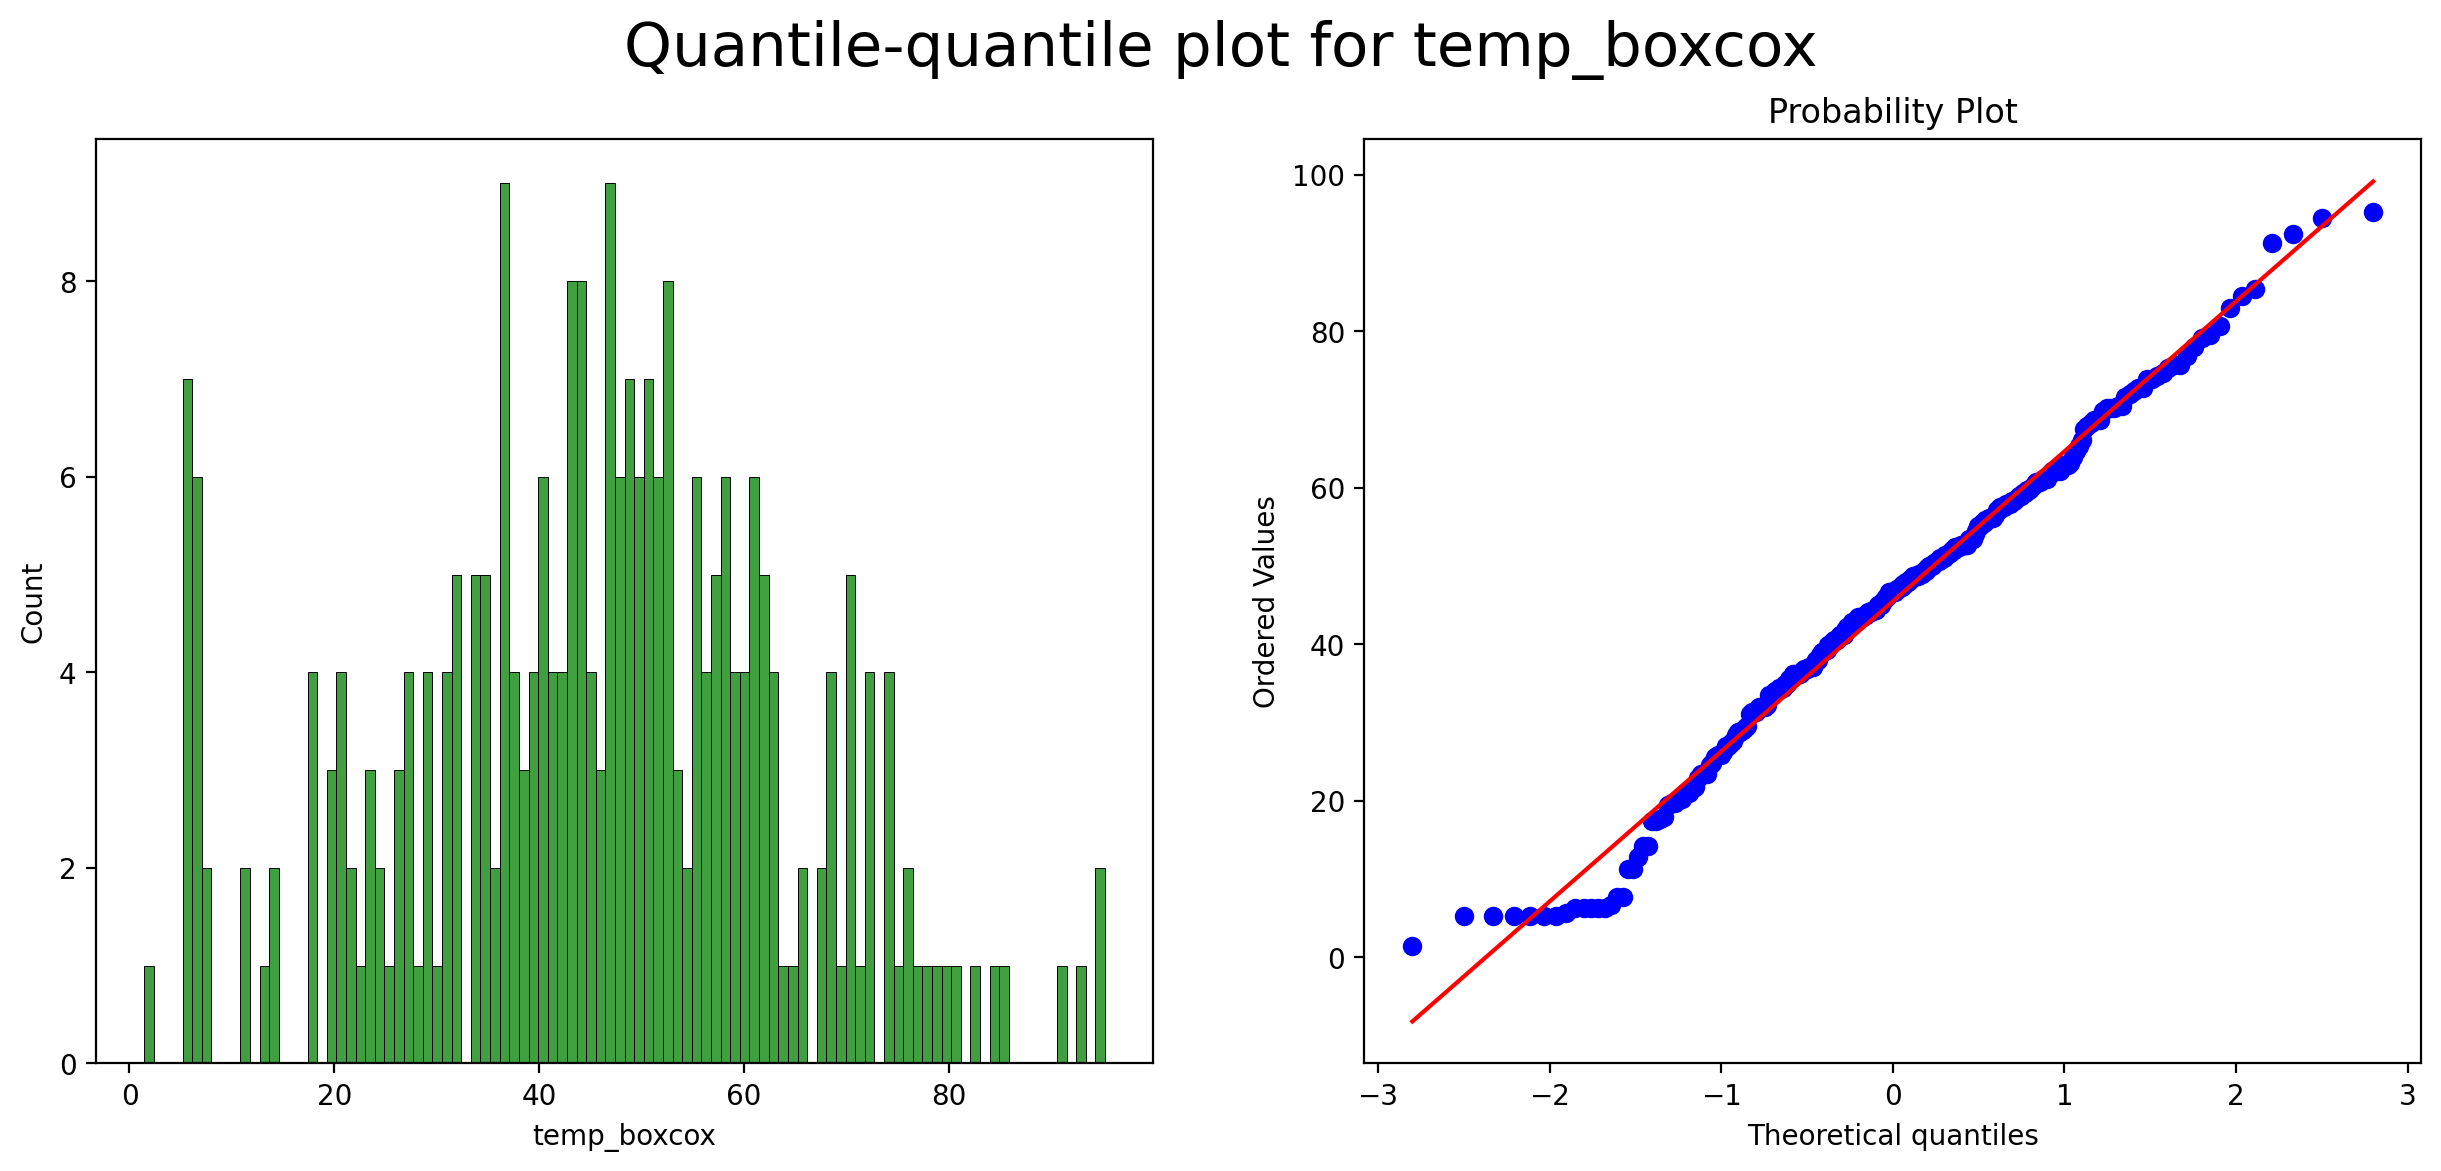

========== RH ==========


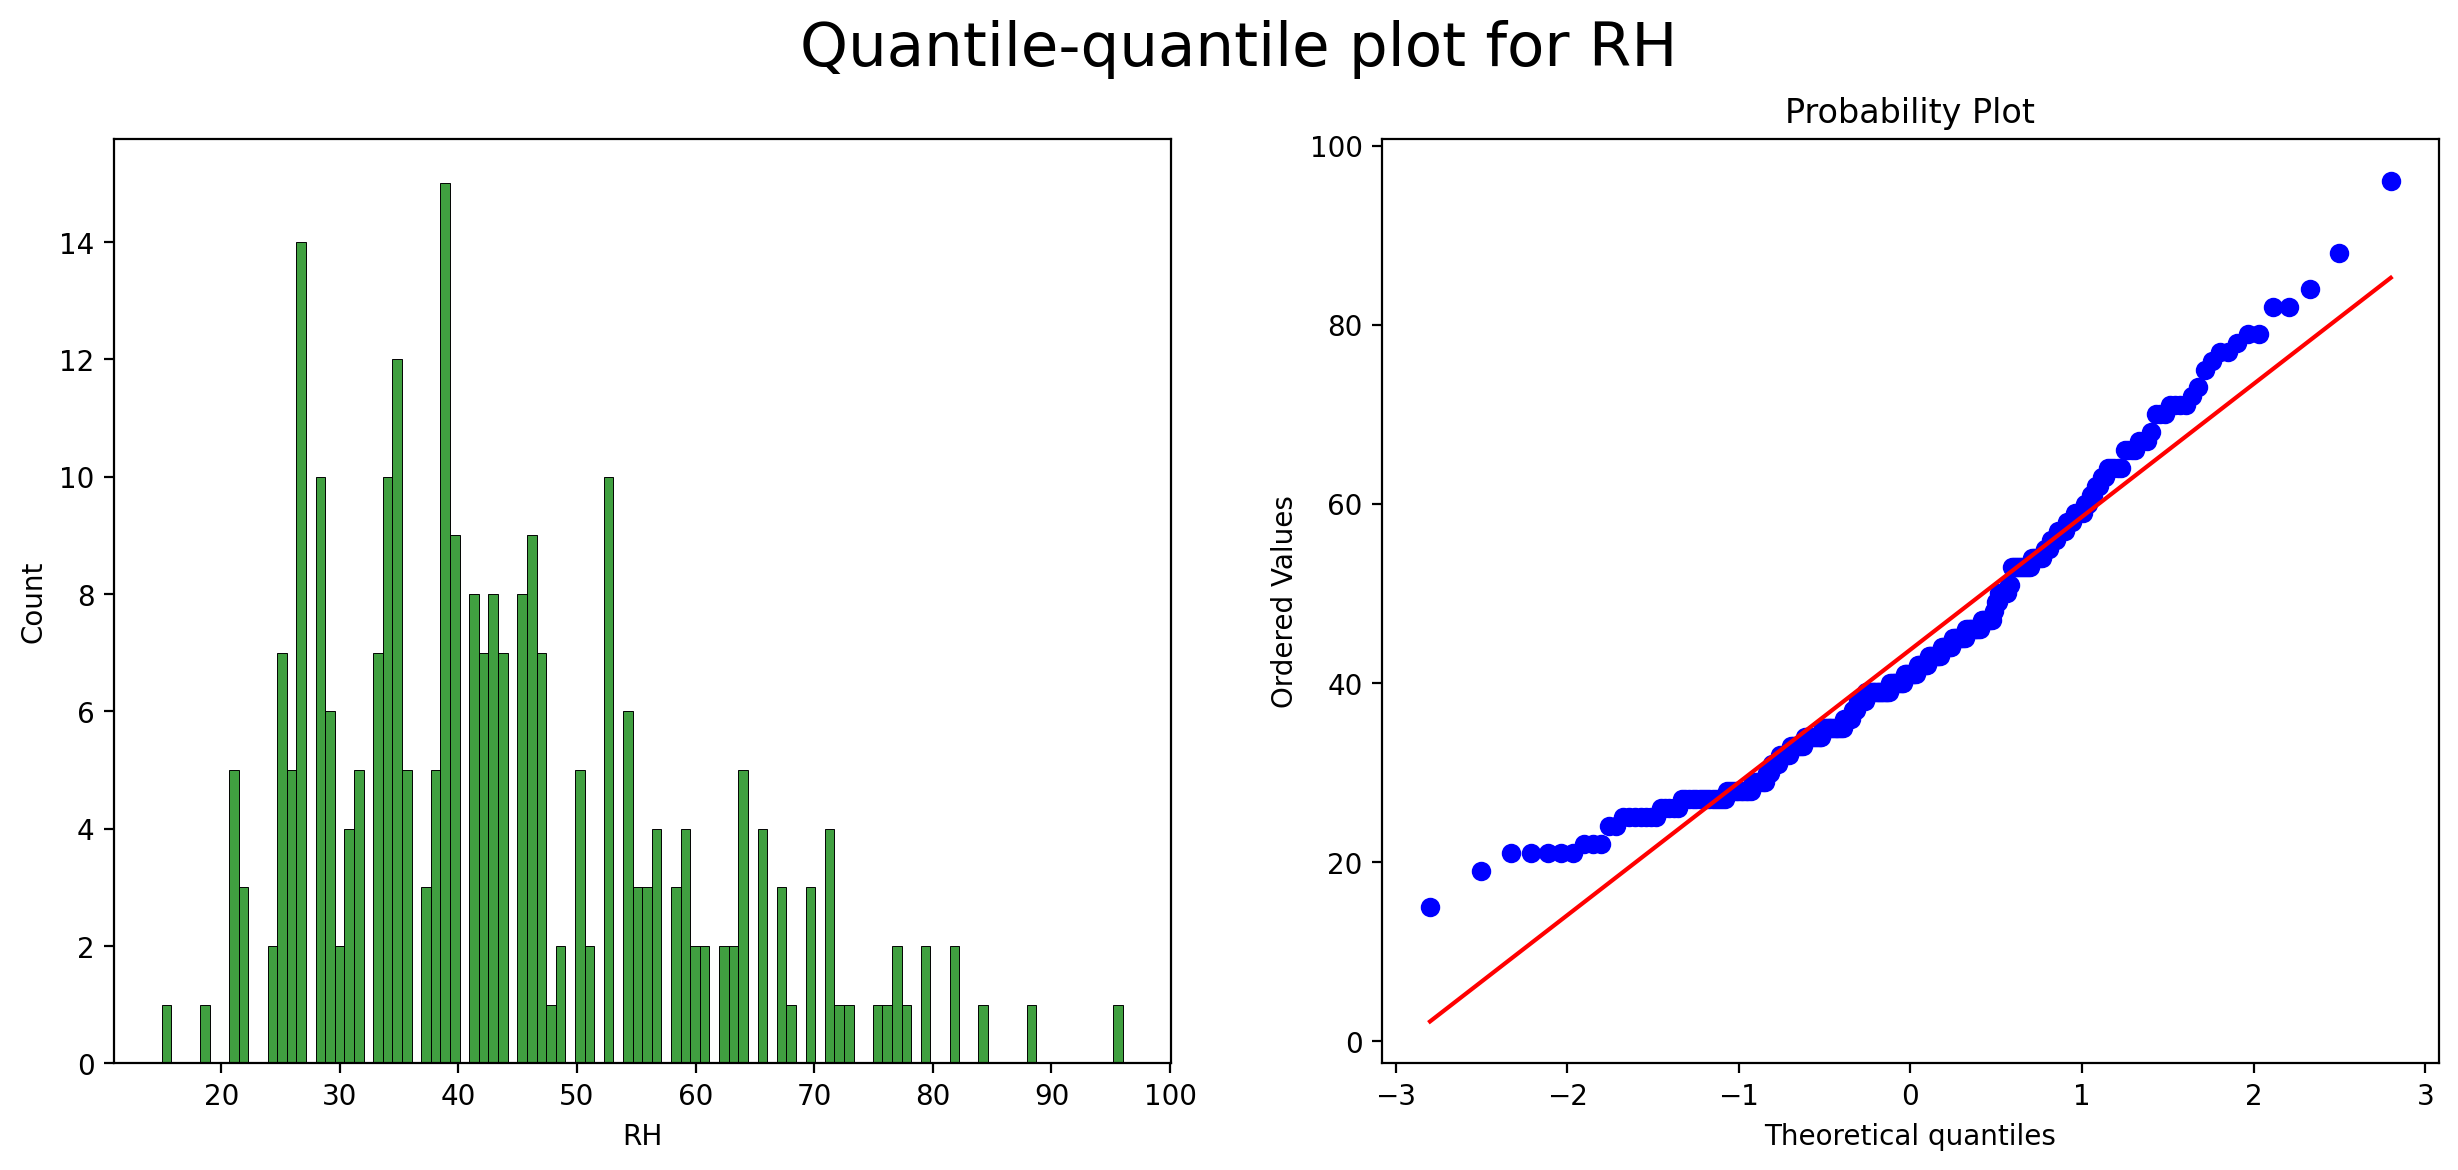

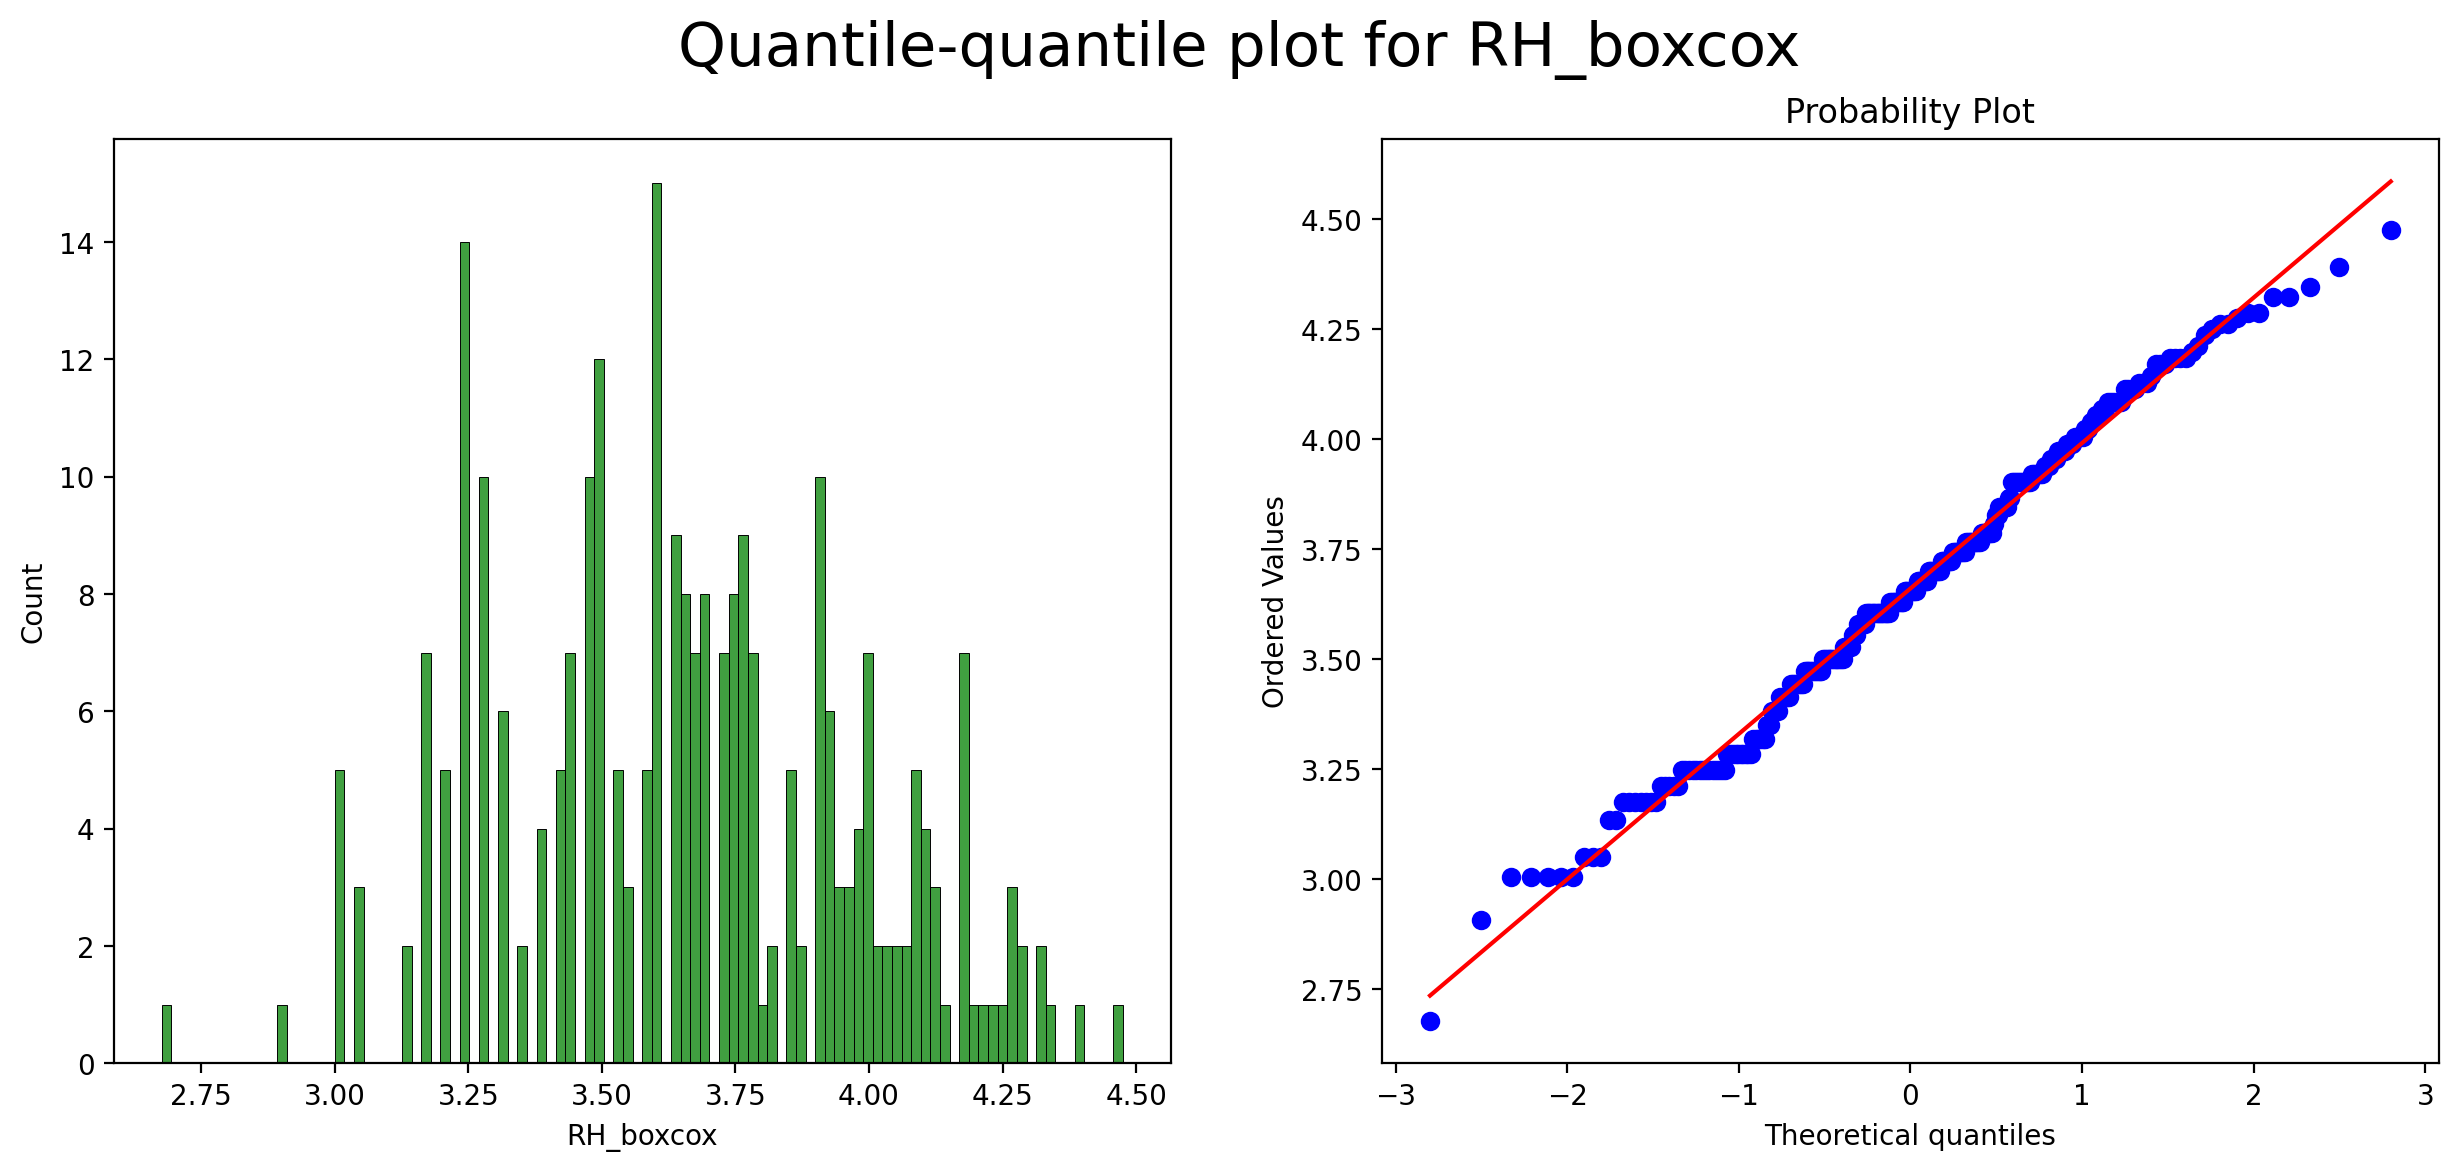

========== wind ==========


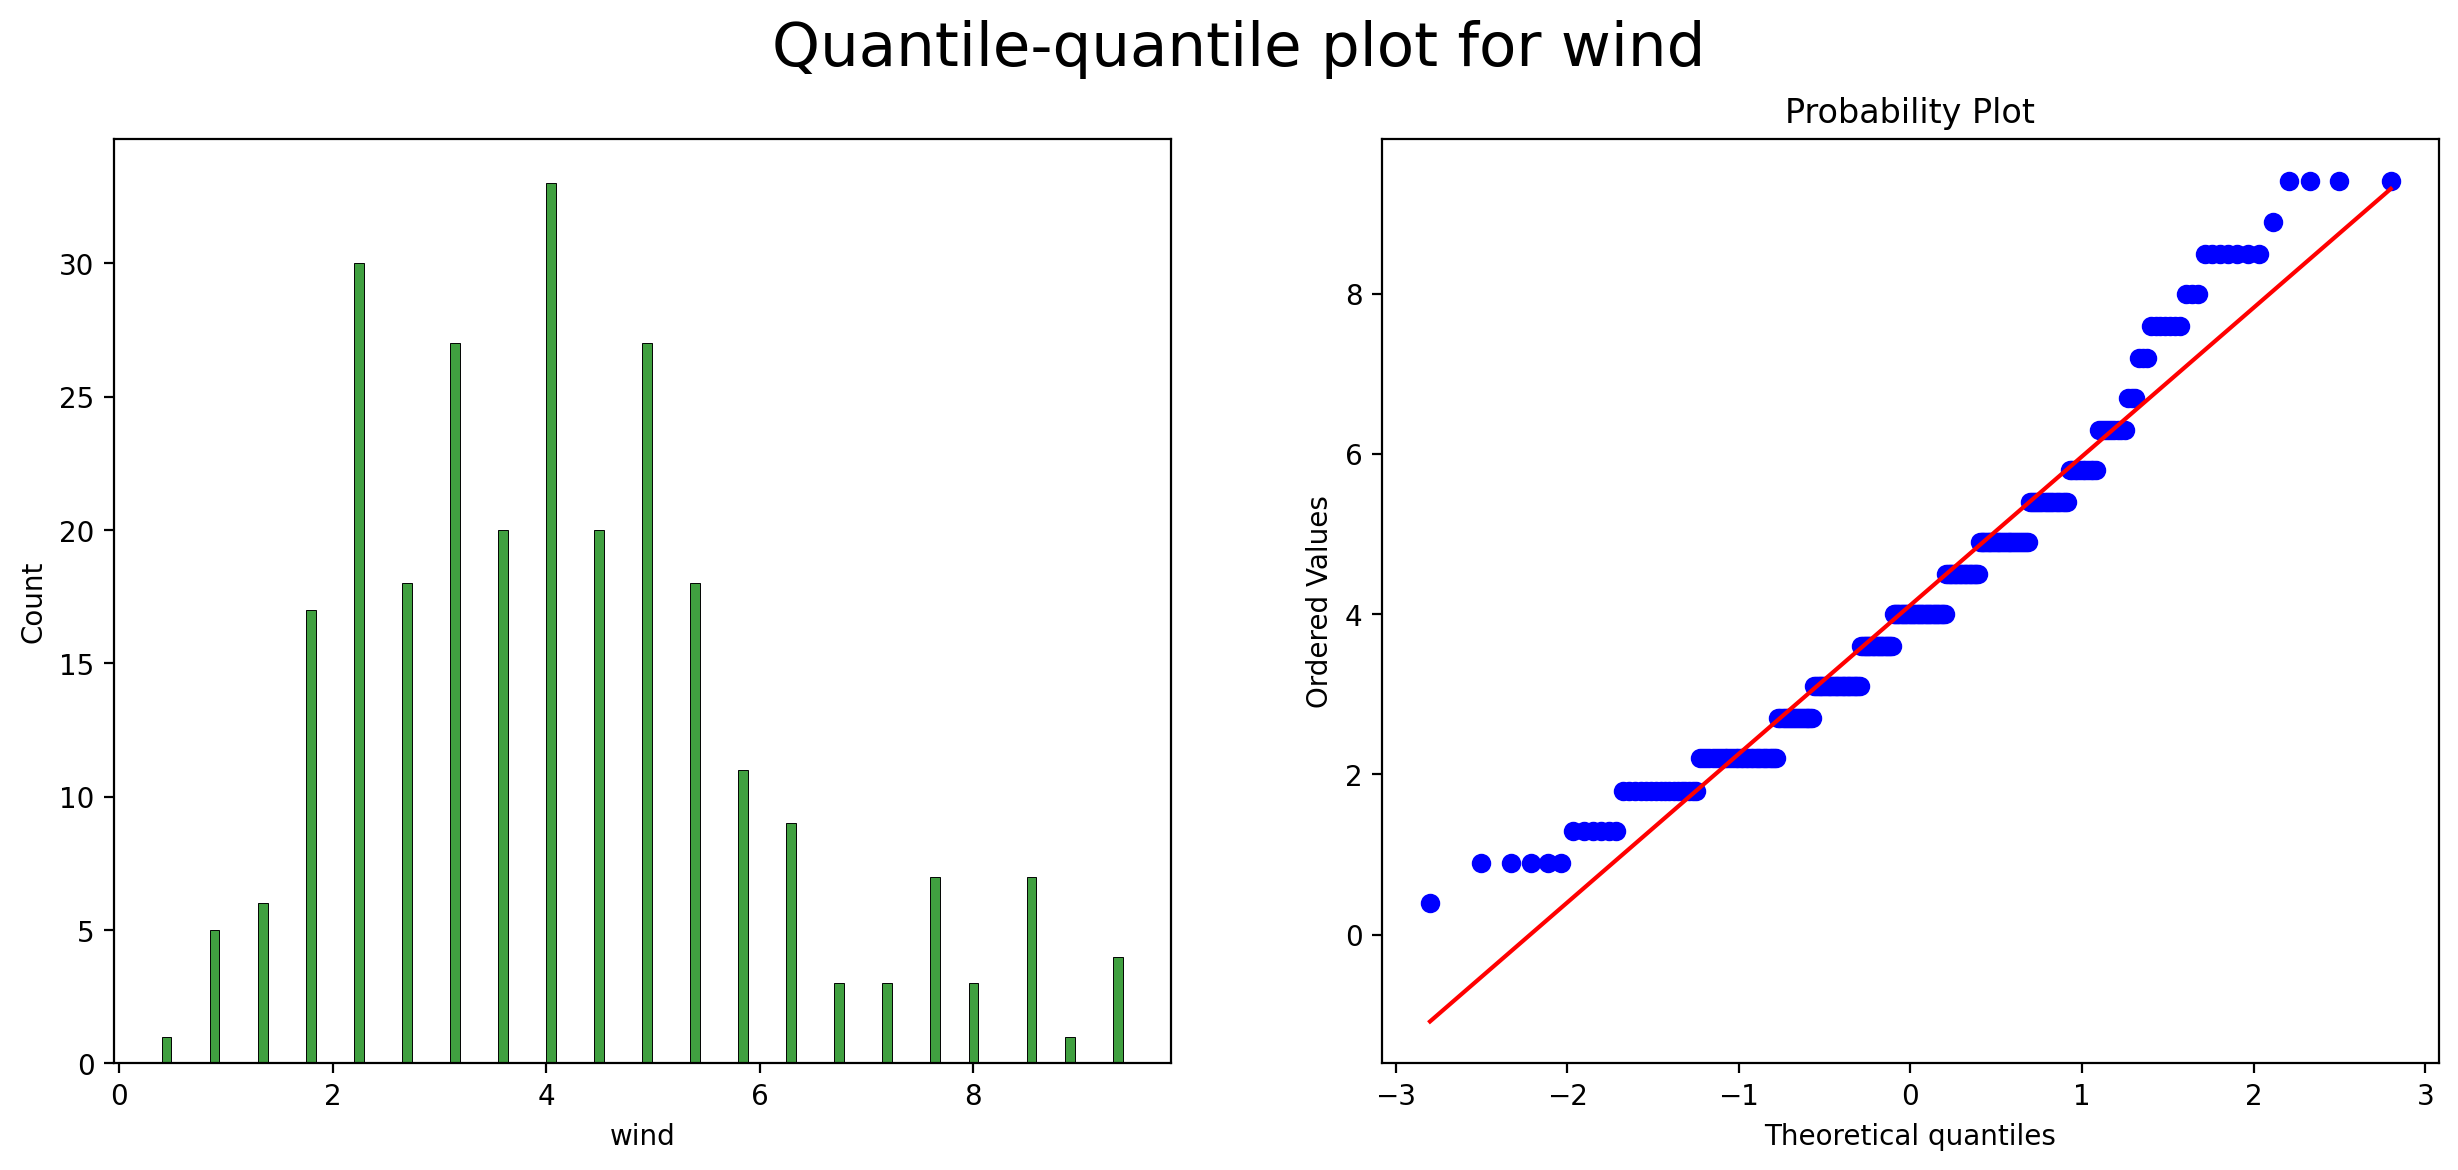

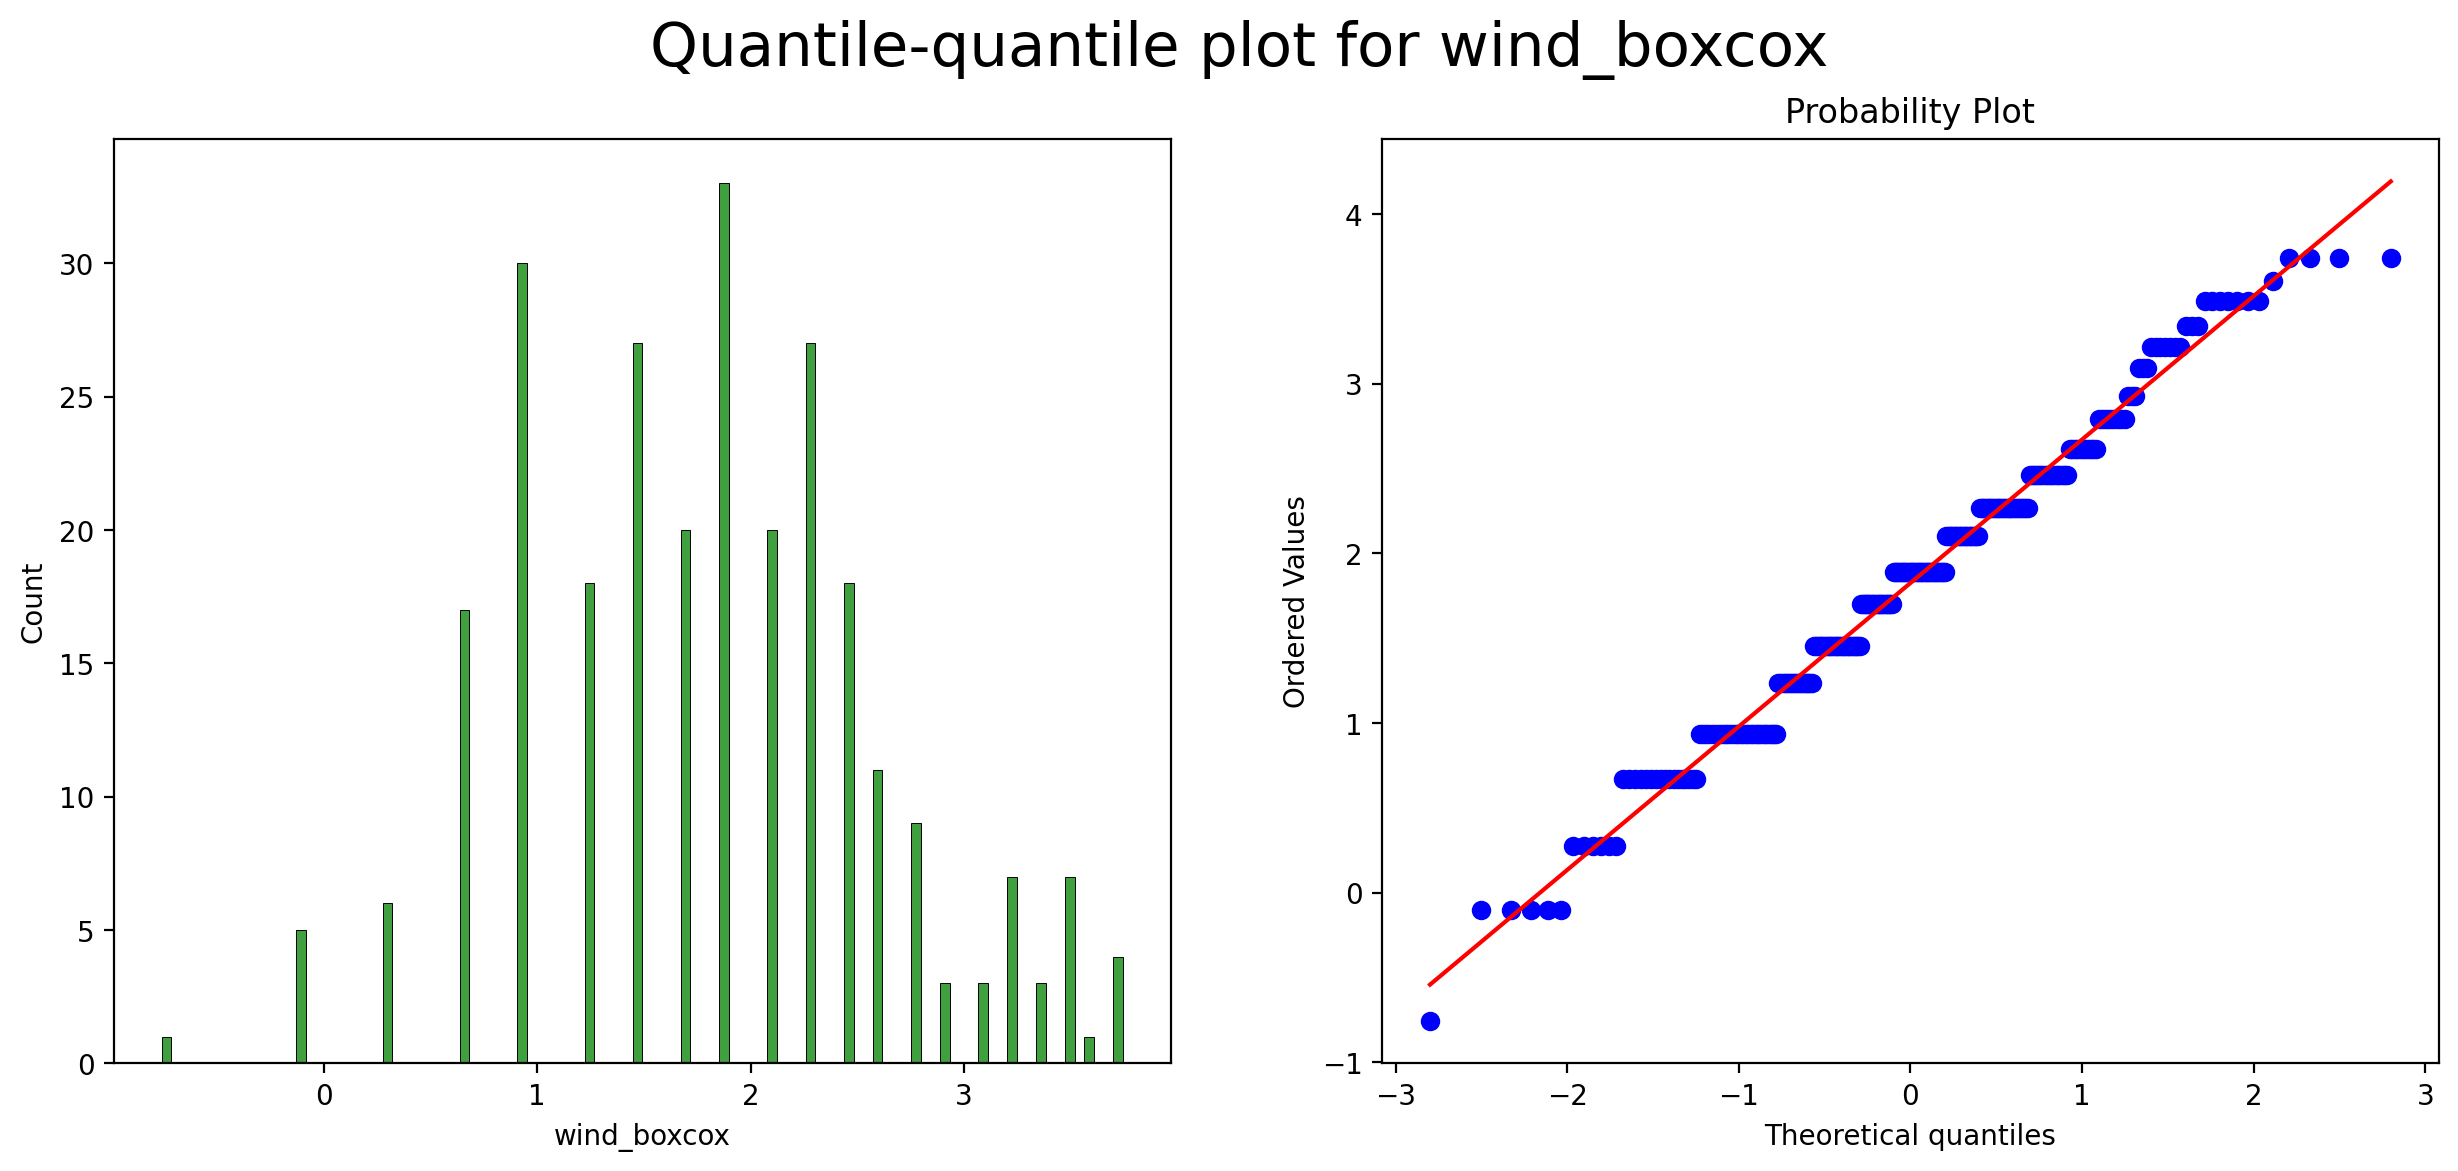

In [226]:
for i in col:
    print(f'========== {i} ==========')
    diagnostic_plots(d_n0, f'{i}')
    diagnostic_plots(d_n0, f'{i}_boxcox')

In [227]:
d_n0 = d_n0[['X', 'Y', 'month', 'day', 'rain', 'area_boxcox', 'FFMC_boxcox', 'DMC_boxcox', 'DC_boxcox', 'ISI_boxcox', 'temp_boxcox', 'RH_boxcox', 'wind_boxcox']]  

In [228]:
d_n0.to_csv('./data/transformed_df_n0.csv', index = False)